<img src="http://www.cidaen.es/assets/img/mCIDaeNnb.png" alt="Logo CiDAEN" align="right">




<br><br><br>
<h2><font color="#00586D" size=4>Capstone VI</font></h2>



<h1><font color="#00586D" size=5>Analysis of a classification problem with deep learning</font></h1>
<br><br>

<div align="right">
<font color="#00586D" size=3>Fernando Rubio, Daniel González</font><br>
<font color="#00586D" size=3>Master in Data Science and Data Engineering in the Cloud</font><br>
<font color="#00586D" size=3>University of Castilla-La Mancha</font>

</div>

In [ ]:
! pip install autokeras

In [ ]:
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
import seaborn as sns
import sklearn.metrics as metrics
import sklearn.metrics as confusion_matrix
from sklearn.model_selection import train_test_split
import autokeras as ak
from tensorflow.keras import layers

Using TensorFlow backend


**Note**: in this notebook it is essential to use the GPU to train our networks.

---

<a id="indice"></a>
<h2><font color="#00586D" size=5>Index</font></h2>


*[1. Introduction](#section1)* [2. Dataset](#section2)
*[3. Data preprocessing](#section3)* [4. Example](#section4)
*[5. Creating a model from scratch](#section5)* [6. Hyperparameter tuning](#section6)
*[7. Pre-trained models](#section7)* [8. Data augmentation](#section8)
* [9. Autokeras](#section9)

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section1"></a>
## <font color="#00586D"> 1. Introduction</font>
<br>

The goal of the Capstone is to **simulate a complete analysis of an image classification problem using Deep Learning**.

The analysis is made up of a series of steps that we will look at in detail one by one, which can serve as a guide to follow when solving a problem with Deep Learning. The **steps** that we are going to follow are the following:

1. **Dataset**: Download and preview the data.
2. **Data preprocessing**: we will prepare the images so that they can be trained.
3. **Model from scratch**: Creation of a neural network from scratch.
4. **Hyperparameter tuning**: Improvement of the previous model by tuning hyperparameters.
5. **Pre-trained models (fine-tunning)**: Use of *Finetunning* techniques on a pre-trained model.
6. **Data augmentation (Optional)**: Use of *data augmentation* in the dataset.
7. **Conclusion**: some conclusions must be drawn from the results obtained, deciding which of the trained models we could deploy in production to use.

The points to complete are from 3 to 7, in **each point details exactly what has to be done**, that is, there will be blank code blocks and the network architecture and configuration will be detailed of the training, so the networks to be created will be those indicated in each step.

At the end of each step we will have to comment on the results obtained in the training, drawing **conclusions from the experiments** that we are going to carry out, justifying and measuring the performance of the models obtained according to the techniques we use. The evaluation of the models will be carried out in terms of hit rate and the confusion matrix of the classes.

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:




cd drive/MyDrive/

/content/drive/MyDrive


<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section2"></a>
## <font color="#00586D"> 2. Dataset</font>
<br>
The dataset used is made up of images of different dog breeds. The dataset contains 12,891 images with 74 breeds, therefore, the objective will be to create and train a model that classifies the breed of a dog from an image. To download the dataset, execute the following cell:

In [ ]:

#!wget 'https://pruebasaluuclm-my.sharepoint.com/:u:/g/personal/fernando_rubio_uclm_es/ESpljekZA9dAgxsfc3qIDvEBMT76g8rPDOpMwgDwHe0BKw?download=1'
#!mv 'ESpljekZA9dAgxsfc3qIDvEBMT76g8rPDOpMwgDwHe0BKw?download=1' dog-images.zip
#!unzip -q dog-images.zip

A `dog-images.zip` file will be downloaded and automatically decompressed creating the `dog-dataset` folder containing the complete dataset. The structure of the downloaded files will be:

```
--> dog-images.zip
--> dog-dataset/
--> test.csv
--> train.csv
--> valid.csv
--> dog-images/
--> Afghan_hound/
--> African_hunting_dog/
--> ...
```


Inside the `dog-dataset` folder there will be 3 files *CSVs* and another folder (`dog-images`):

*`dog-images` folder: contains all the images in the dataset. The images are distributed by folders according to different races (74 folders in total). The name of each folder corresponds to the race.* `train.csv`: Data set for training, 8,992 images. The file is in *CSV* format and each row corresponds to a different image. The *CSV* has 2 columns, the *label* column that corresponds to the class (race) and the *path* column that corresponds to the path where each image is in the `dog-images` folder.
*`valid.csv`: Data set for validation, 1,894 images. Same format as `train.csv`.* `test.csv`: data set for the test, 2,005 images. Same format as `train.csv`.

Below are several images of the dataset.

In [ ]:
def show_images(img_paths):
    fig=plt.figure(figsize=(20, 20))
    index = np.random.randint(len(img_paths), size=100)
    for i in range(100):
        fig.add_subplot(10, 10, i+1)
        plt.axis('off')
        img = Image.open(img_paths[index[i]])
        plt.imshow(img)
    plt.show()

files = [f for f in glob.glob("dog-dataset/dog-images/**/*.jpg", recursive=True)]
show_images(files)

We can observe the following characteristics that can complicate the problem:

- The images are **different sizes**.
- There are **different objects in the images**.

We are going to create a list (`classes`) with the name of the dog breeds that will be the classes in which the models we create will be classified:

In [ ]:
classes = [f.split('/')[-1] for f in glob.glob("dog-dataset/dog-images/**")]
classes

['Pekinese',
 'Afghan_hound',
 'beagle',
 'bluetick',
 'black-and-tan_coonhound',
 'Walker_hound',
 'borzoi',
 'Norwegian_elkhound',
 'American_Staffordshire_terrier',
 'Irish_terrier',
 'Yorkshire_terrier',
 'Lakeland_terrier',
 'Sealyham_terrier',
 'cairn',
 'Dandie_Dinmont',
 'Scotch_terrier',
 'soft-coated_wheaten_terrier',
 'West_Highland_white_terrier',
 'Lhasa',
 'golden_retriever',
 'Labrador_retriever',
 'Gordon_setter',
 'Brittany_spaniel',
 'clumber',
 'English_springer',
 'cocker_spaniel',
 'groenendael',
 'briard',
 'Old_English_sheepdog',
 'German_shepherd',
 'Greater_Swiss_Mountain_dog',
 'Bernese_mountain_dog',
 'bull_mastiff',
 'Tibetan_mastiff',
 'Saint_Bernard',
 'malamute',
 'pug',
 'Pomeranian',
 'chow',
 'keeshond',
 'Brabancon_griffon',
 'Pembroke',
 'Cardigan',
 'miniature_poodle',
 'standard_poodle',
 'Mexican_hairless',
 'Japanese_spaniel',
 'Blenheim_spaniel',
 'toy_terrier',
 'bloodhound',
 'Irish_wolfhound',
 'Scottish_deerhound',
 'Sussex_spaniel',
 'Irish

We are going to show a random image for each class:

In [ ]:
img_per_class = {}

for c in classes:
   files = [f for f in glob.glob(f"dog-dataset/dog-images/{c}/**.jpg")]
   index = np.random.randint(len(files))
   img_per_class[c] = files[index]


fig=plt.figure(figsize=(20, 20))
for i, (k, v) in enumerate(img_per_class.items()):
    fig.add_subplot(10, 10, i+1)
    plt.axis('off')
    img = Image.open(v)
    plt.title(k);
    plt.imshow(img)
plt.show()

Let's see if the classes are balanced:

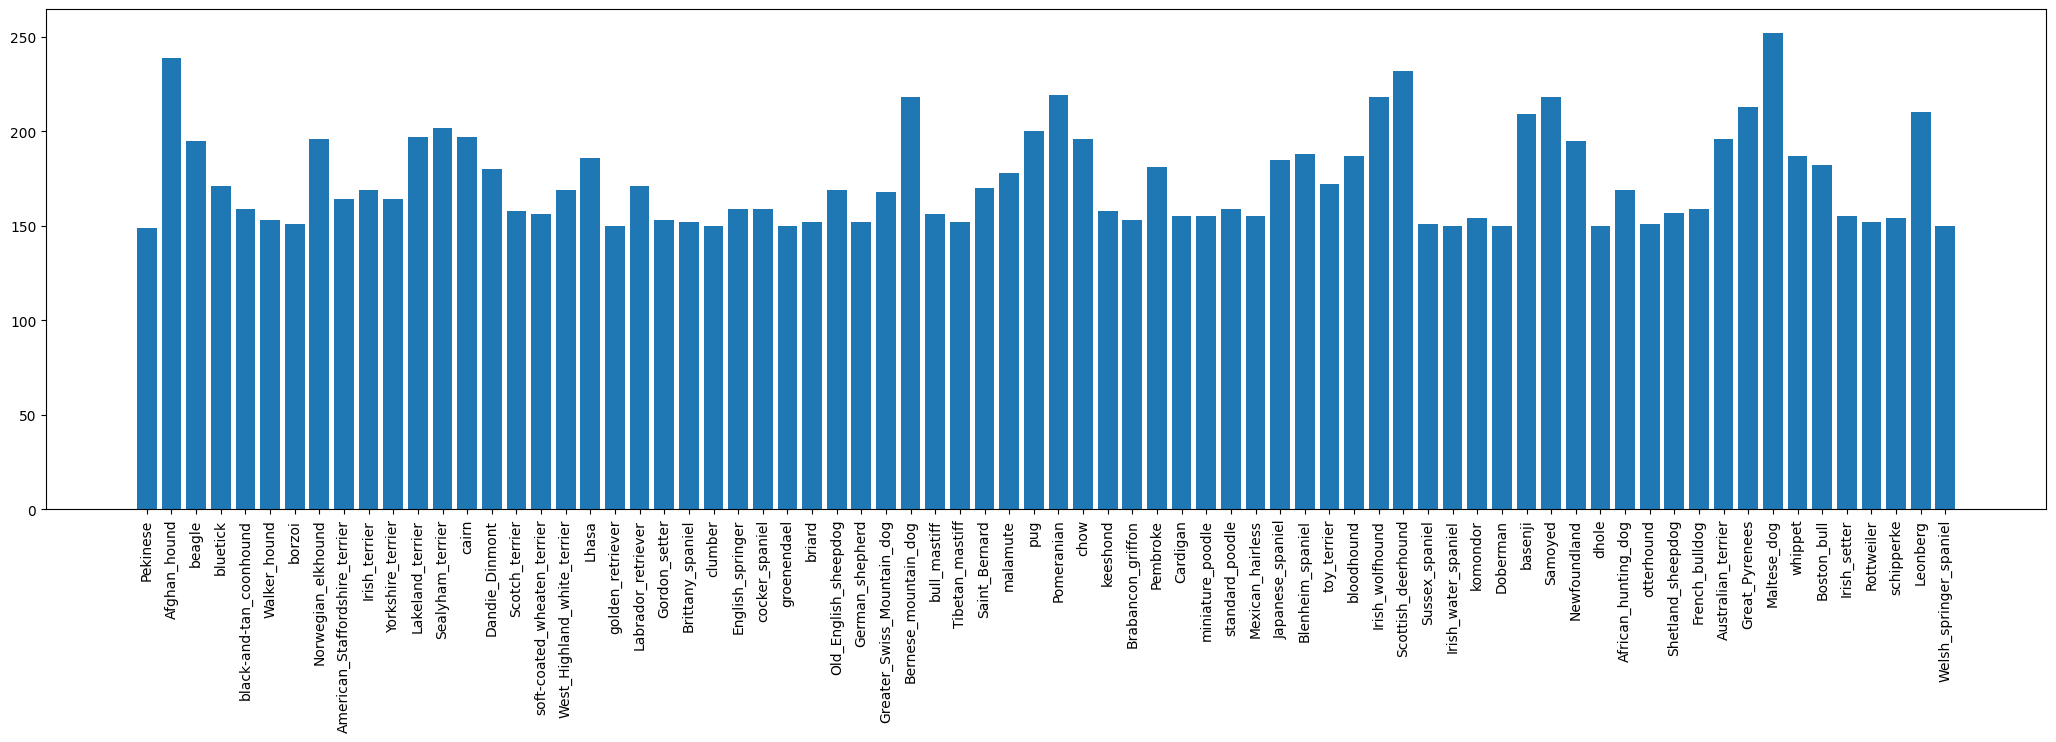

In [ ]:
targets = [len([f for f in glob.glob(f"dog-dataset/dog-images/{c}/**.jpg")]) for c in classes]

fig = plt.figure(figsize=(20, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(classes,targets)
plt.xticks(rotation='vertical')
plt.show()

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section3"></a>
## <font color="#00586D"> 3. Data preprocessing</font>
<br>

In this section we are going to load the data by creating the dataset for the training, validation and test set. In other practices we have seen how to load batches of images with `tf.keras.utils.Sequence` and `tf.data.Dataset`. In this case, we are going to focus on the second, since it is more efficient, especially in Colab, as we discussed in the Bulk Data Loading section.

In this Capstone we are going to give you a series of functions that allow you to run the experiments more quickly so that you don't have to worry about configuring the database.

In [ ]:

def read_image(image_path, label):
    """
      Cargamos una imagen usando su ruta (path), la convertimos en tensor y la normalizamos
    """
    contents = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(contents, channels=3)
    img = tf.cast(img, tf.float64)
    img /= 255.0
    return img, label

def resize_image(img, label, target_size):
    """
      Redimensionamos una imagen
    """
    resized_img = tf.image.resize(img, target_size)
    return resized_img, label

def get_dataset(image_paths, image_labels, target_size, batch_size, prep_func=None):
    """
      - Generamos un objeto tf.data.Dataset para optimizar el entrenamiento desde los
        paths de las imagenes
      - Aplicamos las funciones read_image y resize_image a las imagenes
      - Podemos usar una función prep_func si queremos hacer fine-tunning
    """
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, image_labels))
    dataset = dataset.map(read_image)
    dataset = dataset.map(lambda x, y: resize_image(x, y, target_size))

    if prep_func != None:
        dataset = dataset.map(lambda x, y: (x*255.0, y))
        dataset = dataset.map(lambda x, y: (prep_func(x), y))
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(1)
    return dataset

With these functions, we can create `tf.data.Dataset` that are optimal when reading images in memory and executing the batches and the way to create and execute them is as follows:

```python
# we define the target img_size and the batch_size
img_size = (224,224,3)
batch_size = 32

# this function gets the database, and we can even pass it a preprocessing function
train_dataset = get_dataset(images_train_paths, labels_train, img_size[0:-1], batch_size)

# we only have to call fit with the database
model.fit(train_dataset, epochs=10)
```

This is how we will have to call the method in successive cells when we want to train our networks.

Although we have the csv with the `train`, `valid` and `test` sets, we are going to generate the partitions ourselves to see how it is done and to make sure we do it correctly.

In [ ]:
num_to_label = {i: c for i, c in enumerate(classes)}
label_to_num = {c: i for i, c in enumerate(classes)}
image_paths = np.array([f for f in glob.glob("dog-dataset/dog-images/**/*.jpg", recursive=True)])
image_labels =  np.array([label_to_num[f.split('/')[-2]] for f in glob.glob("dog-dataset/dog-images/**/*.jpg", recursive=True)])

In [ ]:
shuffler = np.random.permutation(len(image_paths))
image_paths = image_paths[shuffler]
image_labels = image_labels[shuffler]

# Train/valid/test split
x_train_valid, x_test, y_train_valid, y_test = train_test_split(image_paths, image_labels, test_size=0.1, random_state=1234, stratify=image_labels)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=0.2, random_state=5678, stratify=y_train_valid)

print("Train: ", x_train.shape)
print("Valid: ", x_valid.shape)
print("Test: ", x_test.shape)

del x_train_valid, y_train_valid

Train:  (9280,)
Valid:  (2321,)
Test:  (1290,)


Once we have the partitions ready, we only have to create the datasets with the provided functions.

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section4"></a>
## <font color="#00586D"> 4. Experiment example</font>
<br>

Here we show you an example of an experiment and evaluation of a model. You can base the models that you have to create on this. In addition to the train and validation graphs, there is a cell that shows the confusion matrix of the class and that you should use in the exercises.

### <font color="#00586D"> Network architecture and configuration</font>

The network architecture must be following:
*Input size will be `(100, 120, 3)`.* Layer *Fully connected* with 1 neuron with *ReLU* activation.
*Output layer with*softmax*.

Training settings:* Loss function: `categorical_crossentropy`
*Optimizer: `Adam`*Learning rate: 0.001
*Epochs: 2*Batch size: 128

In [ ]:
# Cargamos datos con las funciones de generación de dataset
img_size = (100,120,3)
train_dataset = get_dataset(x_train, y_train, img_size[:-1], 128)
valid_dataset = get_dataset(x_valid, y_valid, img_size[:-1], 128)
test_dataset = get_dataset(x_test, y_test, img_size[:-1], 128)

In [ ]:
# Creamos nuestra red
model = tf.keras.Sequential([
  tf.keras.layers.Input(img_size),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="relu"),
  tf.keras.layers.Dense(len(classes), activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 36000)             0         
                                                                 
 dense (Dense)               (None, 1)                 36001     
                                                                 
 dense_1 (Dense)             (None, 74)                148       
                                                                 
Total params: 36,149
Trainable params: 36,149
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Configuramos entrenamiento
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Entrenamos
history = model.fit(train_dataset, epochs=2, validation_data=valid_dataset)

Epoch 1/2
73/73 [==============================] - 995s 14s/step - loss: 4.3037 - accuracy: 0.0173 - val_loss: 4.3024 - val_accuracy: 0.0198
Epoch 2/2
73/73 [==============================] - 50s 692ms/step - loss: 4.3020 - accuracy: 0.0195 - val_loss: 4.3010 - val_accuracy: 0.0198


In [ ]:
# Evaluamos con el conjunto de test
model.evaluate(test_dataset)

11/11 [==============================] - 109s 10s/step - loss: 4.3009 - accuracy: 0.0194


[4.300859451293945, 0.01937984488904476]

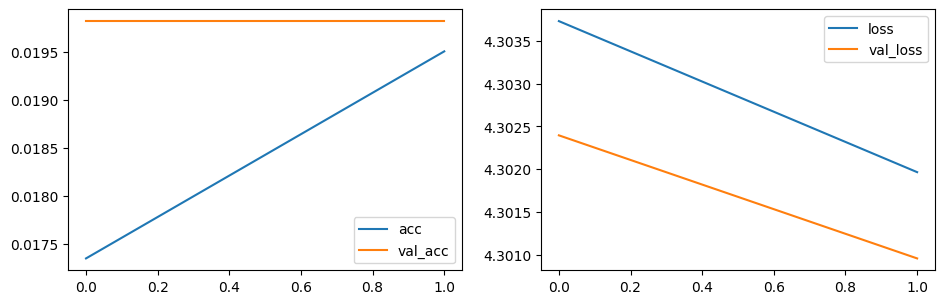

In [ ]:
# Visualizamos la evolución de los epochs
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# precision
fig.add_subplot(10, 10, 1)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.show()

11/11 [==============================] - 4s 383ms/step


<Axes: >

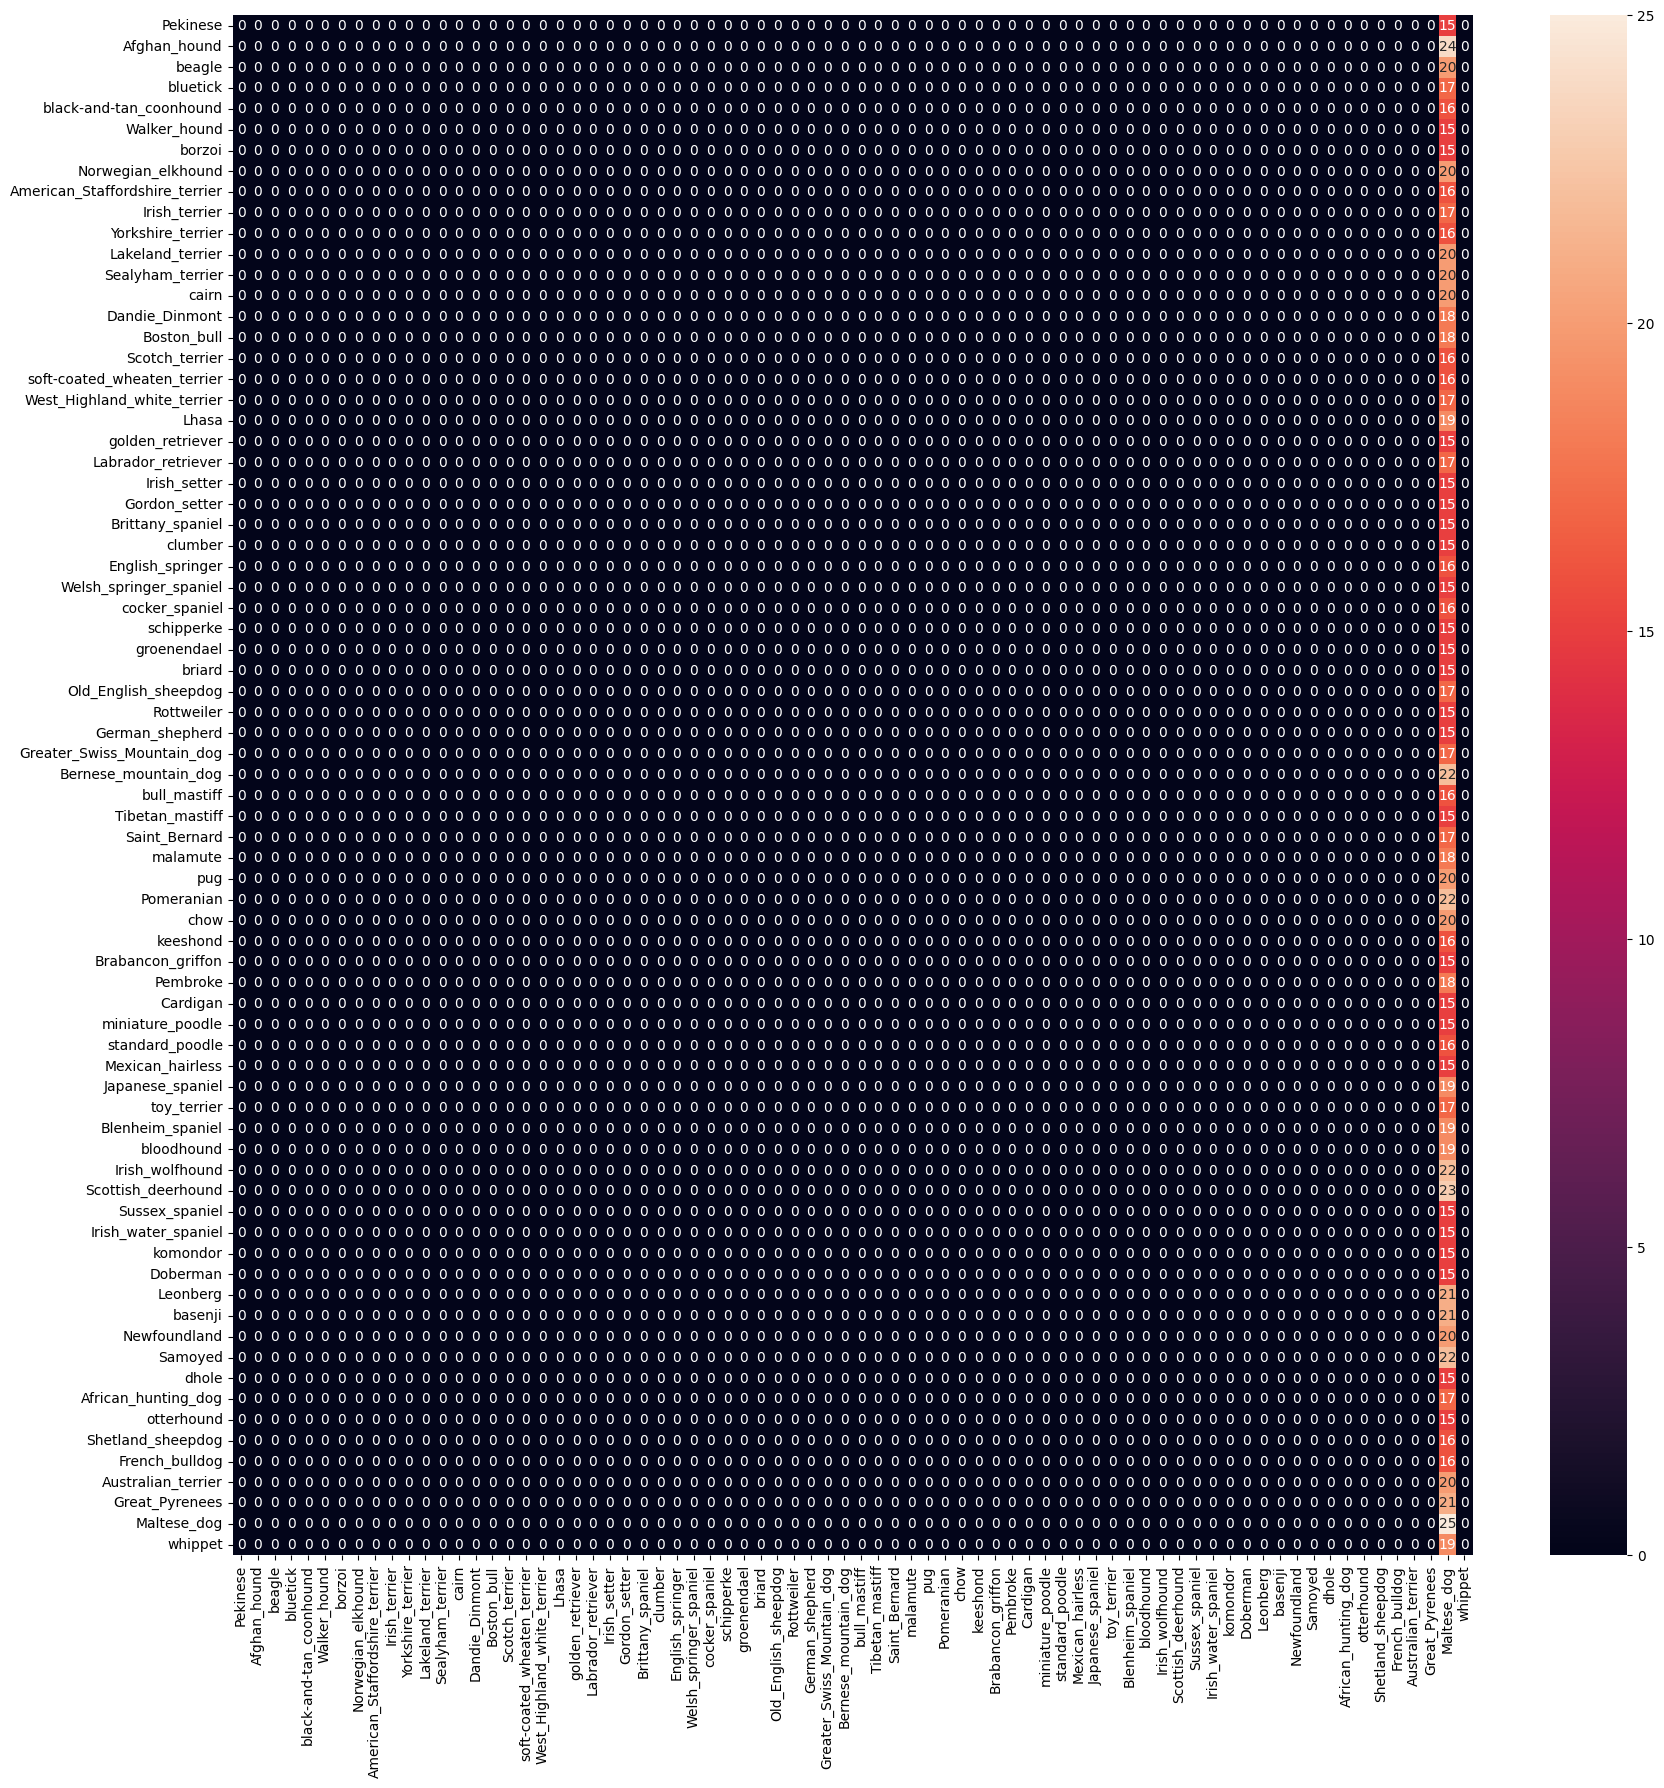

In [ ]:
# Visualizamos la matriz de confusion
predictions = model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=1)
y_true= y_test
confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)

df_cm=pd.DataFrame(confusion_matrix, index = [i for  i in classes], columns = [i for i in classes])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section5"></a>
## <font color="#00586D"> 5. Creating a model from scratch</font>
<br>


In this section, a convolutional network will be designed and trained following a *VGG16* type structure like the ones we saw in class. Once the network is trained, you will have to evaluate the result.

### <font color="#00586D"> Network architecture and configuration</font>

The network architecture must be following:
*Input size will be `(100, 120, 3)`.* Convolutional layer with 32 kernels of size 5x5 with *ReLU* activation.
*Layer*Max Pooling*with reduction of 2.* Convolutional layer with 64 kernels of size 5x5 with *ReLU* activation.
*Layer*Max Pooling*with reduction of 2.* Layer *Fully connected* with 1024 neurons with *ReLU* activation.
*Output layer with*softmax*.

Training settings:* Loss function: `categorical_crossentropy`
*Optimizer: `Adam`*Learning rate: 0.001
*Epochs: 10*Batch size: 128

In [ ]:
# Cargamos datos con las funciones de generación de dataset
img_size = (100,120,3)
train_dataset = get_dataset(x_train, y_train, img_size[:-1], 128)
valid_dataset = get_dataset(x_valid, y_valid, img_size[:-1], 128)
test_dataset = get_dataset(x_test, y_test, img_size[:-1], 128)

In [ ]:
# COMPLETAR:
#   - Crear la red
model = tf.keras.models.Sequential([

  tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation="relu", input_shape=(100,120,3)),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

  tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dense(len(classes), activation="softmax")

])


In [ ]:
#   - Entrena la red
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
73/73 [==============================] - 534s 7s/step - loss: 4.2690 - accuracy: 0.0289 - val_loss: 4.0799 - val_accuracy: 0.0461
Epoch 2/10
73/73 [==============================] - 552s 8s/step - loss: 3.7671 - accuracy: 0.1065 - val_loss: 4.1098 - val_accuracy: 0.0681
Epoch 3/10
73/73 [==============================] - 547s 7s/step - loss: 2.7895 - accuracy: 0.3137 - val_loss: 5.1466 - val_accuracy: 0.0689
Epoch 4/10
73/73 [==============================] - 534s 7s/step - loss: 1.8682 - accuracy: 0.5247 - val_loss: 6.0886 - val_accuracy: 0.0668
Epoch 5/10
73/73 [==============================] - 535s 7s/step - loss: 0.9623 - accuracy: 0.7513 - val_loss: 7.9022 - val_accuracy: 0.0694
Epoch 6/10
73/73 [==============================] - 541s 7s/step - loss: 0.5185 - accuracy: 0.8761 - val_loss: 9.2390 - val_accuracy: 0.0642
Epoch 7/10
73/73 [==============================] - 548s 8s/step - loss: 0.3268 - accuracy: 0.9205 - val_loss: 9.0169 - val_accuracy: 0.0646
Epoch 8/10
73

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 116, 32)       2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 58, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 54, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 27, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 38016)             0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

In [ ]:
#   - Evalúa la red
model.evaluate(test_dataset)

11/11 [==============================] - 20s 2s/step - loss: 11.2720 - accuracy: 0.0713


[11.272021293640137, 0.07131782919168472]

Obtain the evaluation graphs and the confusion matrix and draw conclusions from these results

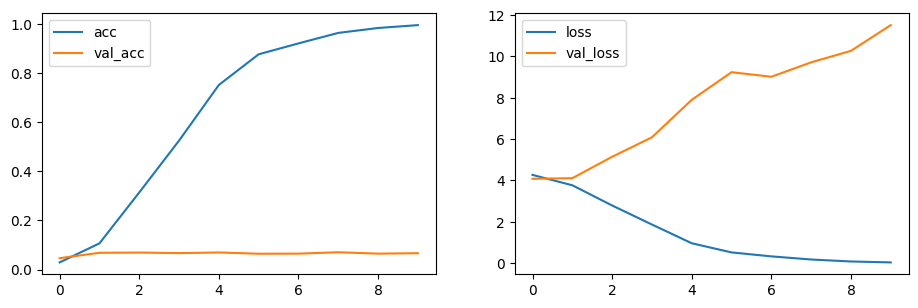

In [ ]:
# Visualizamos la evolución de los epochs
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# precision
fig.add_subplot(10, 10, 1)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.show()

11/11 [==============================] - 20s 2s/step


<Axes: >

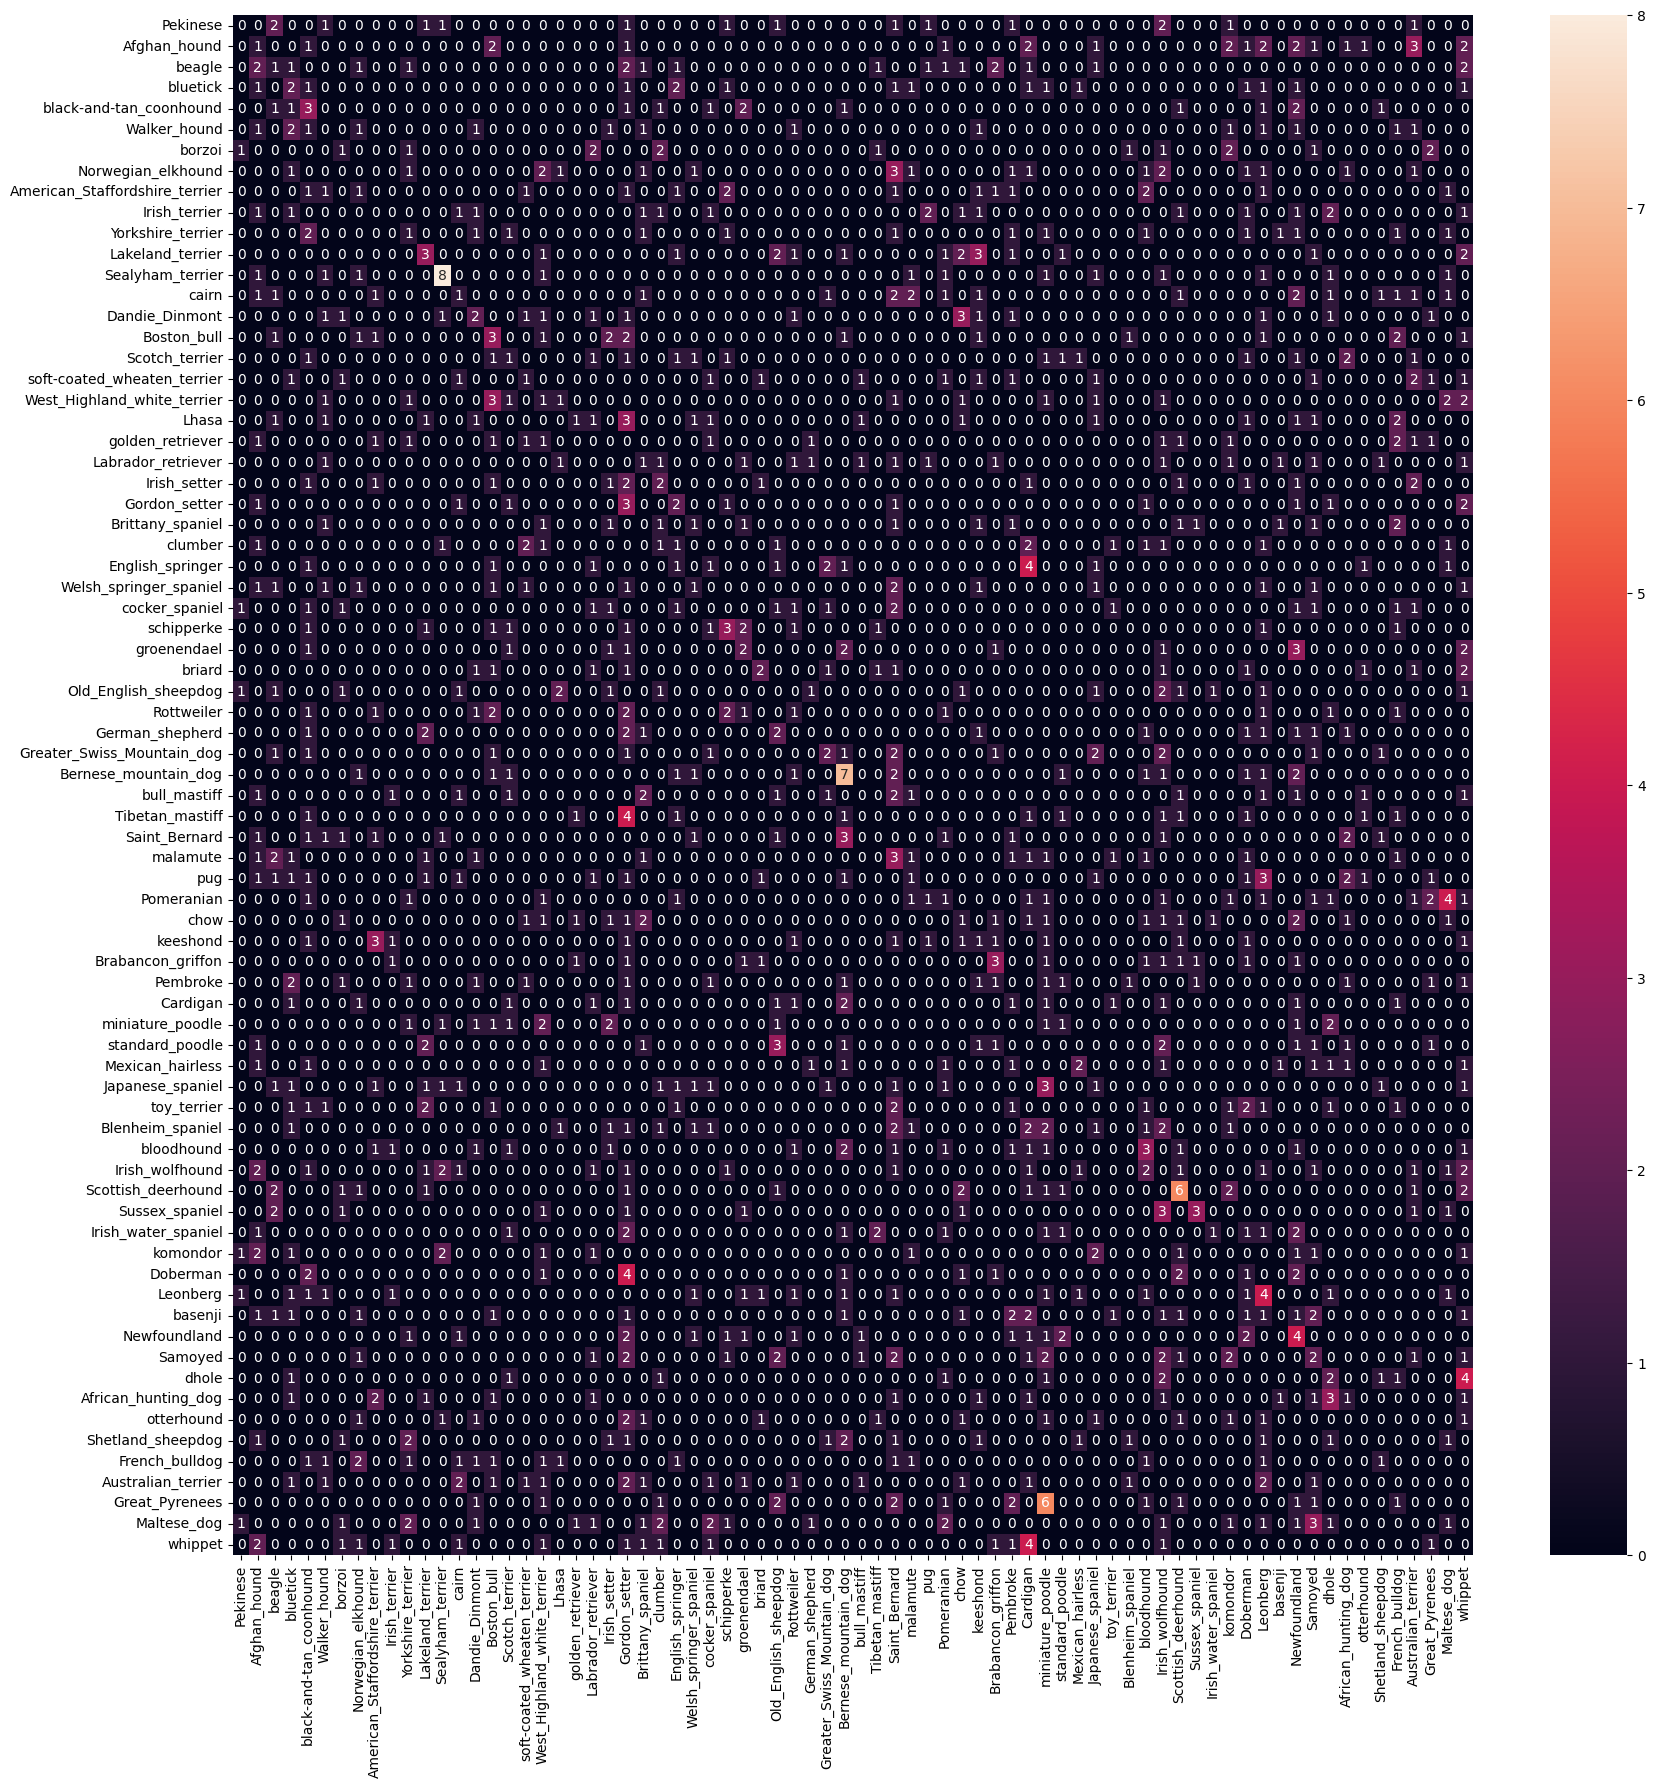

In [ ]:
# Visualizamos la matriz de confusion
predictions = model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=1)
y_true= y_test
confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)

df_cm=pd.DataFrame(confusion_matrix, index = [i for  i in classes], columns = [i for i in classes])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

---

Through the training of the model and the development of the Epochs, it can be observed that the error (loss) decreases and the accuracy increases, while the validation loss increases and the validation accuracy remains at low and relatively constant values ​​(decreases and increases slightly depending on the epoch).
A model that adequately fits the parameters should not experience increased validation loss values ​​and should have high model validation accuracy values ​​(also, the difference between training and validation accuracy is too high). high, with the training accuracy being 99% and the validation accuracy being 6% in the last epoch).
<br>
Regarding the evolution graph of the epochs, as mentioned above, we observe that the training accuracy increases while the validation accuracy remains stable or even decreases, and for the loss values ​​we observe that they increase for validation while they decrease for training, which describes a characteristic behavior of overfitting whose possible solution would be to increase the dropout.
<br>
Regarding the confusion matrix, we can see that the predictions are not precise and a diagonal of values ​​is not observed in the confusion matrix (the diagonal in the confusion matrix means that the predicted races agree with the real races, we can see that certain breeds such as Sealyham_terrier or Bernese_mountain_dog are correctly predicted more frequently than other breeds, although they also have errors in their prediction)



---

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section6"></a>
## <font color="#00586D"> 6. Hyperparameter tuning</font>
<br>




In this section we are going to try to improve the previous network with `Dropout` layers and changing the hyperparameters.

The network architecture is as follows:

*Input size will be `(100, 120, 3)`.* Convolutional layer with 32 kernels of size 5x5 with *ReLU* activation.
*Layer*Max Pooling*with reduction of 2.* Layer *Dropout* with value 0.5.
*Convolutional layer with 64 kernels of size 5x5 with*ReLU*activation.* Layer *Max Pooling* with reduction of 2.
*Convolutional layer with 64 kernels of size 5x5 with*ReLU*activation.* Layer *Max Pooling* with reduction of 2.
*Layer*Dropout*with value 0.5.* Layer *Fully connected* with 1024 neurons with *ReLU* activation.
*Layer*Dropout*with value 0.2.* Output layer with *softmax*.

Training settings:
*Loss function: `categorical_crossentropy`* Optimizer: `Adam`
*Learning rate: 0.001* Epochs: 10
* Batch size: 128

In [ ]:
# Cargamos datos con las funciones de generación de dataset
img_size = (100,120,3)
train_dataset = get_dataset(x_train, y_train, img_size[:-1], 128)
valid_dataset = get_dataset(x_valid, y_valid, img_size[:-1], 128)
test_dataset = get_dataset(x_test, y_test, img_size[:-1], 128)

In [ ]:
# COMPLETAR:
#   - Crear la red
model = tf.keras.models.Sequential([

  tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation="relu", input_shape=(100,120,3)),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

  tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
  tf.keras.layers.Dropout(0.5),

  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(len(classes), activation="softmax")
])


In [ ]:
#   - Entrena la red
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
73/73 [==============================] - 521s 7s/step - loss: 4.3031 - accuracy: 0.0203 - val_loss: 4.2538 - val_accuracy: 0.0306
Epoch 2/10
73/73 [==============================] - 512s 7s/step - loss: 4.1277 - accuracy: 0.0430 - val_loss: 3.9897 - val_accuracy: 0.0646
Epoch 3/10
73/73 [==============================] - 514s 7s/step - loss: 3.8649 - accuracy: 0.0745 - val_loss: 3.8431 - val_accuracy: 0.0840
Epoch 4/10
73/73 [==============================] - 512s 7s/step - loss: 3.6944 - accuracy: 0.1043 - val_loss: 3.7674 - val_accuracy: 0.1034
Epoch 5/10
73/73 [==============================] - 515s 7s/step - loss: 3.5321 - accuracy: 0.1399 - val_loss: 3.7452 - val_accuracy: 0.1077
Epoch 6/10
73/73 [==============================] - 514s 7s/step - loss: 3.3462 - accuracy: 0.1690 - val_loss: 3.7307 - val_accuracy: 0.1150
Epoch 7/10
73/73 [==============================] - 512s 7s/step - loss: 3.1817 - accuracy: 0.2097 - val_loss: 3.7841 - val_accuracy: 0.1172
Epoch 8/10
73

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 96, 116, 32)       2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 58, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 48, 58, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 44, 54, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 27, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 23, 64)       

In [ ]:
#   - Evalúa la red
model.evaluate(test_dataset)

11/11 [==============================] - 20s 2s/step - loss: 4.0407 - accuracy: 0.0977


[4.0406904220581055, 0.0976744219660759]

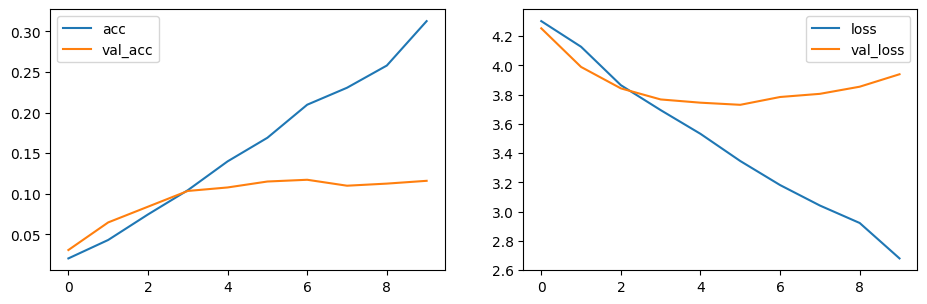

In [ ]:
# Visualizamos la evolución de los epochs
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# precision
fig.add_subplot(10, 10, 1)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.show()

11/11 [==============================] - 20s 2s/step


<Axes: >

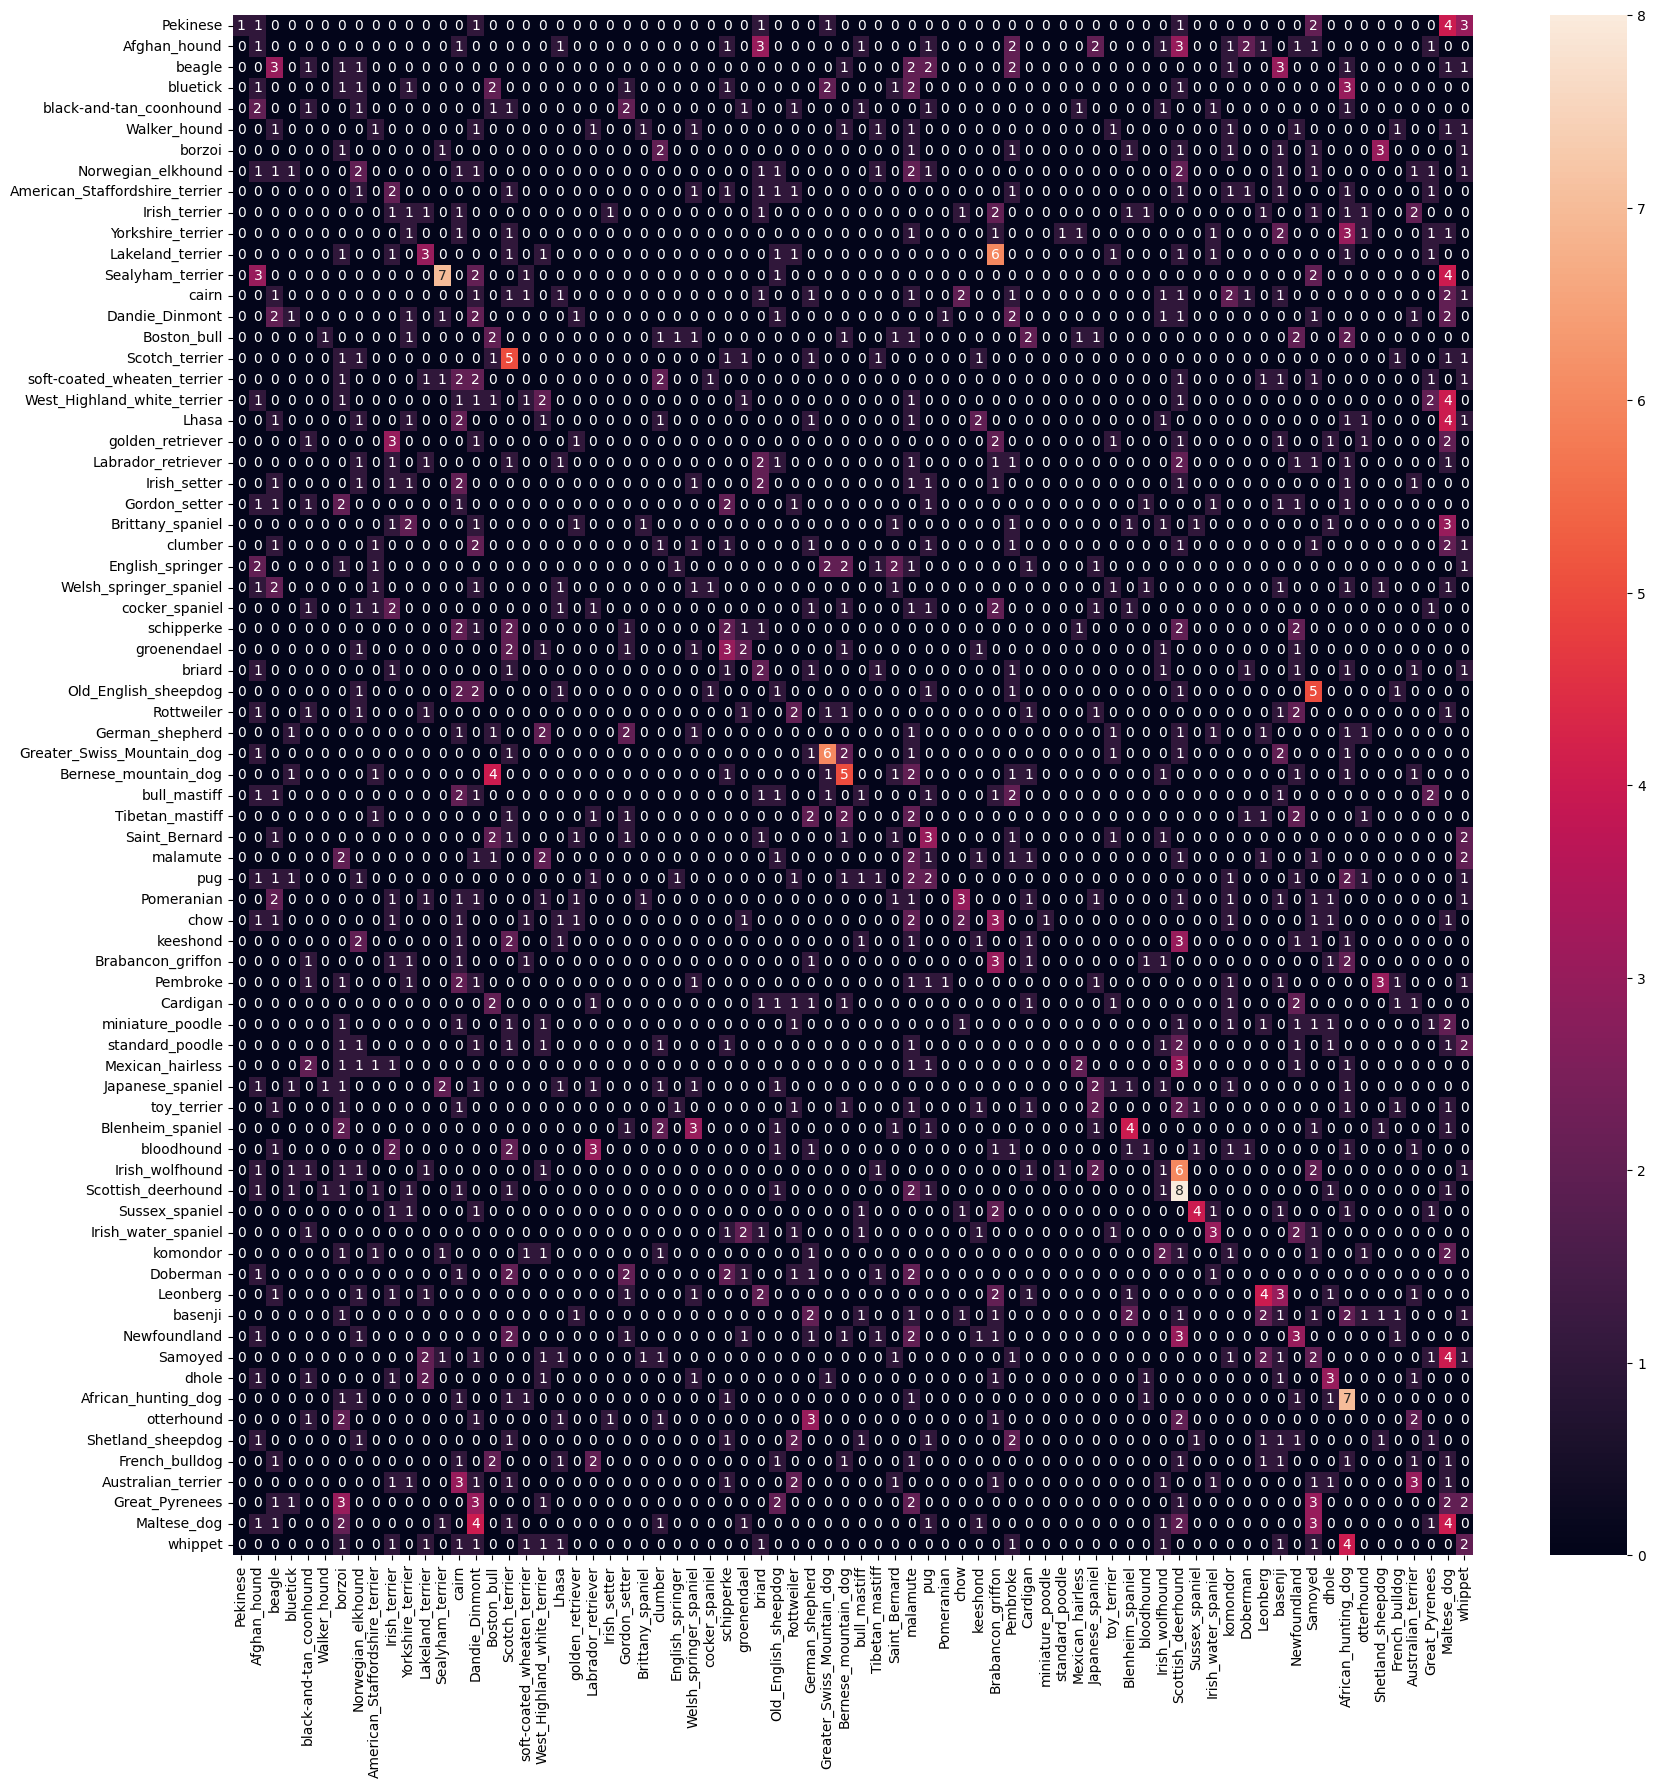

In [ ]:
# Visualizamos la matriz de confusion
predictions = model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=1)
y_true= y_test
confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)

df_cm=pd.DataFrame(confusion_matrix, index = [i for  i in classes], columns = [i for i in classes])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

---

By adding the Dropout layers and modifying the hyperparameters of the previous model we can see that the model does not improve noticeably.
Relative to the accuracy and loss values ​​during training and validation, we observe that the accuracy increases for training and for validation (having in both cases a very small value and increasing for validation more slowly) except in the first epochs in which
 The validation accuracy is greater than the training accuracy (this happens because the training set metrics are obtained from the average of the batch results, while the validation values ​​are obtained once the epoch has ended). Thus, referring to the loss values, we observe that it decreases constantly for training and decreases in the first epochs for validation but then begins to increase (this may be because the model may be too complex for the data or because it was trained for too many epochs and it should have ended when the loss is low and stable, but since the loss values ​​are high we discard the second option) and it should be noted that in the first epochs the loss values ​​for validation are lower than for training.
 <br>As for the confusion matrix, in this case it is observed that the diagonal of predicted value = True value begins to be displayed (possibly because the validation accuracy is greater in this case and therefore predicts the test data better) but we continue having many errors in the predictions so it would not be a model that we considered suitable to use with these data.



---

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section7"></a>
## <font color="#00586D"> 7. Pre-trained models (fine-tunning)</font>
<br>




In this section you will have to use the knowledge about pre-trained models and _fine-tunning_, where you will have to adapt a pre-trained network to our problem. The pre-training model that you will have to use is _Inception_, whose version 3 is one of the most used in _Fine-tuning_ due to its good results.

### <font color="#00586D"> Inception</font>


The network configuration to load is as follows:

*Input size will be `(299, 299, 3)`.* We will choose the configuration `include_top = false` and the `pooling = 'avg'`
* We will add a_Dropout_layer of 0.5
* Output layer with *softmax*.

Training settings:
* Loss function: `categorical_crossentropy`
*Optimizer: `Adam`* Epochs: 10
* Batch size: 128

In [ ]:
img_size = (299, 299, 3)
img_size[:-1]

(299, 299)

In [ ]:
# Cargamos datos con las funciones de generación de dataset
img_size = (299, 299, 3)
train_dataset = get_dataset(x_train, y_train, img_size[:-1], 128)
valid_dataset = get_dataset(x_valid, y_valid, img_size[:-1], 128)
test_dataset = get_dataset(x_test, y_test, img_size[:-1], 128)
# esta vez usams la fucnion de preprocesamiento de inception
base_model = tf.keras.applications.inception_v3.InceptionV3(input_shape=(299, 299, 3), include_top=False, pooling='avg')

for layer in base_model.layers:
    layer.trainable = False

base_model.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d_4[0][0]']               
 alization)           

In [ ]:
x = layers.Dropout(0.5)(base_model.output)
x = layers.Dense(len(classes), activation="softmax")(x)
model = tf.keras.Model(base_model.input, x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d_4[0][0]']               
 alization)                     )                                                             

In [ ]:
#   - Entrena la red

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])#history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

In [ ]:
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
73/73 [==============================] - 91s 919ms/step - loss: 1.6037 - accuracy: 0.7191 - val_loss: 0.3459 - val_accuracy: 0.9375
Epoch 2/10
73/73 [==============================] - 55s 748ms/step - loss: 0.2828 - accuracy: 0.9405 - val_loss: 0.2291 - val_accuracy: 0.9414
Epoch 3/10
73/73 [==============================] - 54s 744ms/step - loss: 0.1966 - accuracy: 0.9512 - val_loss: 0.1958 - val_accuracy: 0.9474
Epoch 4/10
73/73 [==============================] - 52s 713ms/step - loss: 0.1622 - accuracy: 0.9567 - val_loss: 0.1838 - val_accuracy: 0.9453
Epoch 5/10
73/73 [==============================] - 64s 877ms/step - loss: 0.1394 - accuracy: 0.9627 - val_loss: 0.1801 - val_accuracy: 0.9483
Epoch 6/10
73/73 [==============================] - 64s 871ms/step - loss: 0.1235 - accuracy: 0.9678 - val_loss: 0.1777 - val_accuracy: 0.9474
Epoch 7/10
73/73 [==============================] - 53s 728ms/step - loss: 0.1067 - accuracy: 0.9707 - val_loss: 0.1718 - val_accuracy: 0.9487

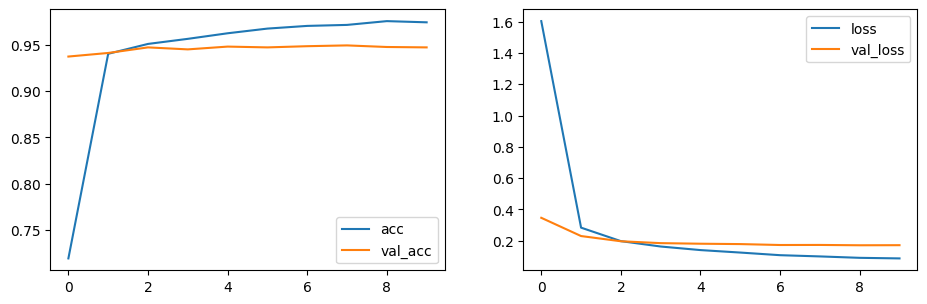

In [ ]:
# Visualizamos la evolución de los epochs
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# precision
fig.add_subplot(10, 10, 1)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.show()

11/11 [==============================] - 12s 981ms/step


<Axes: >

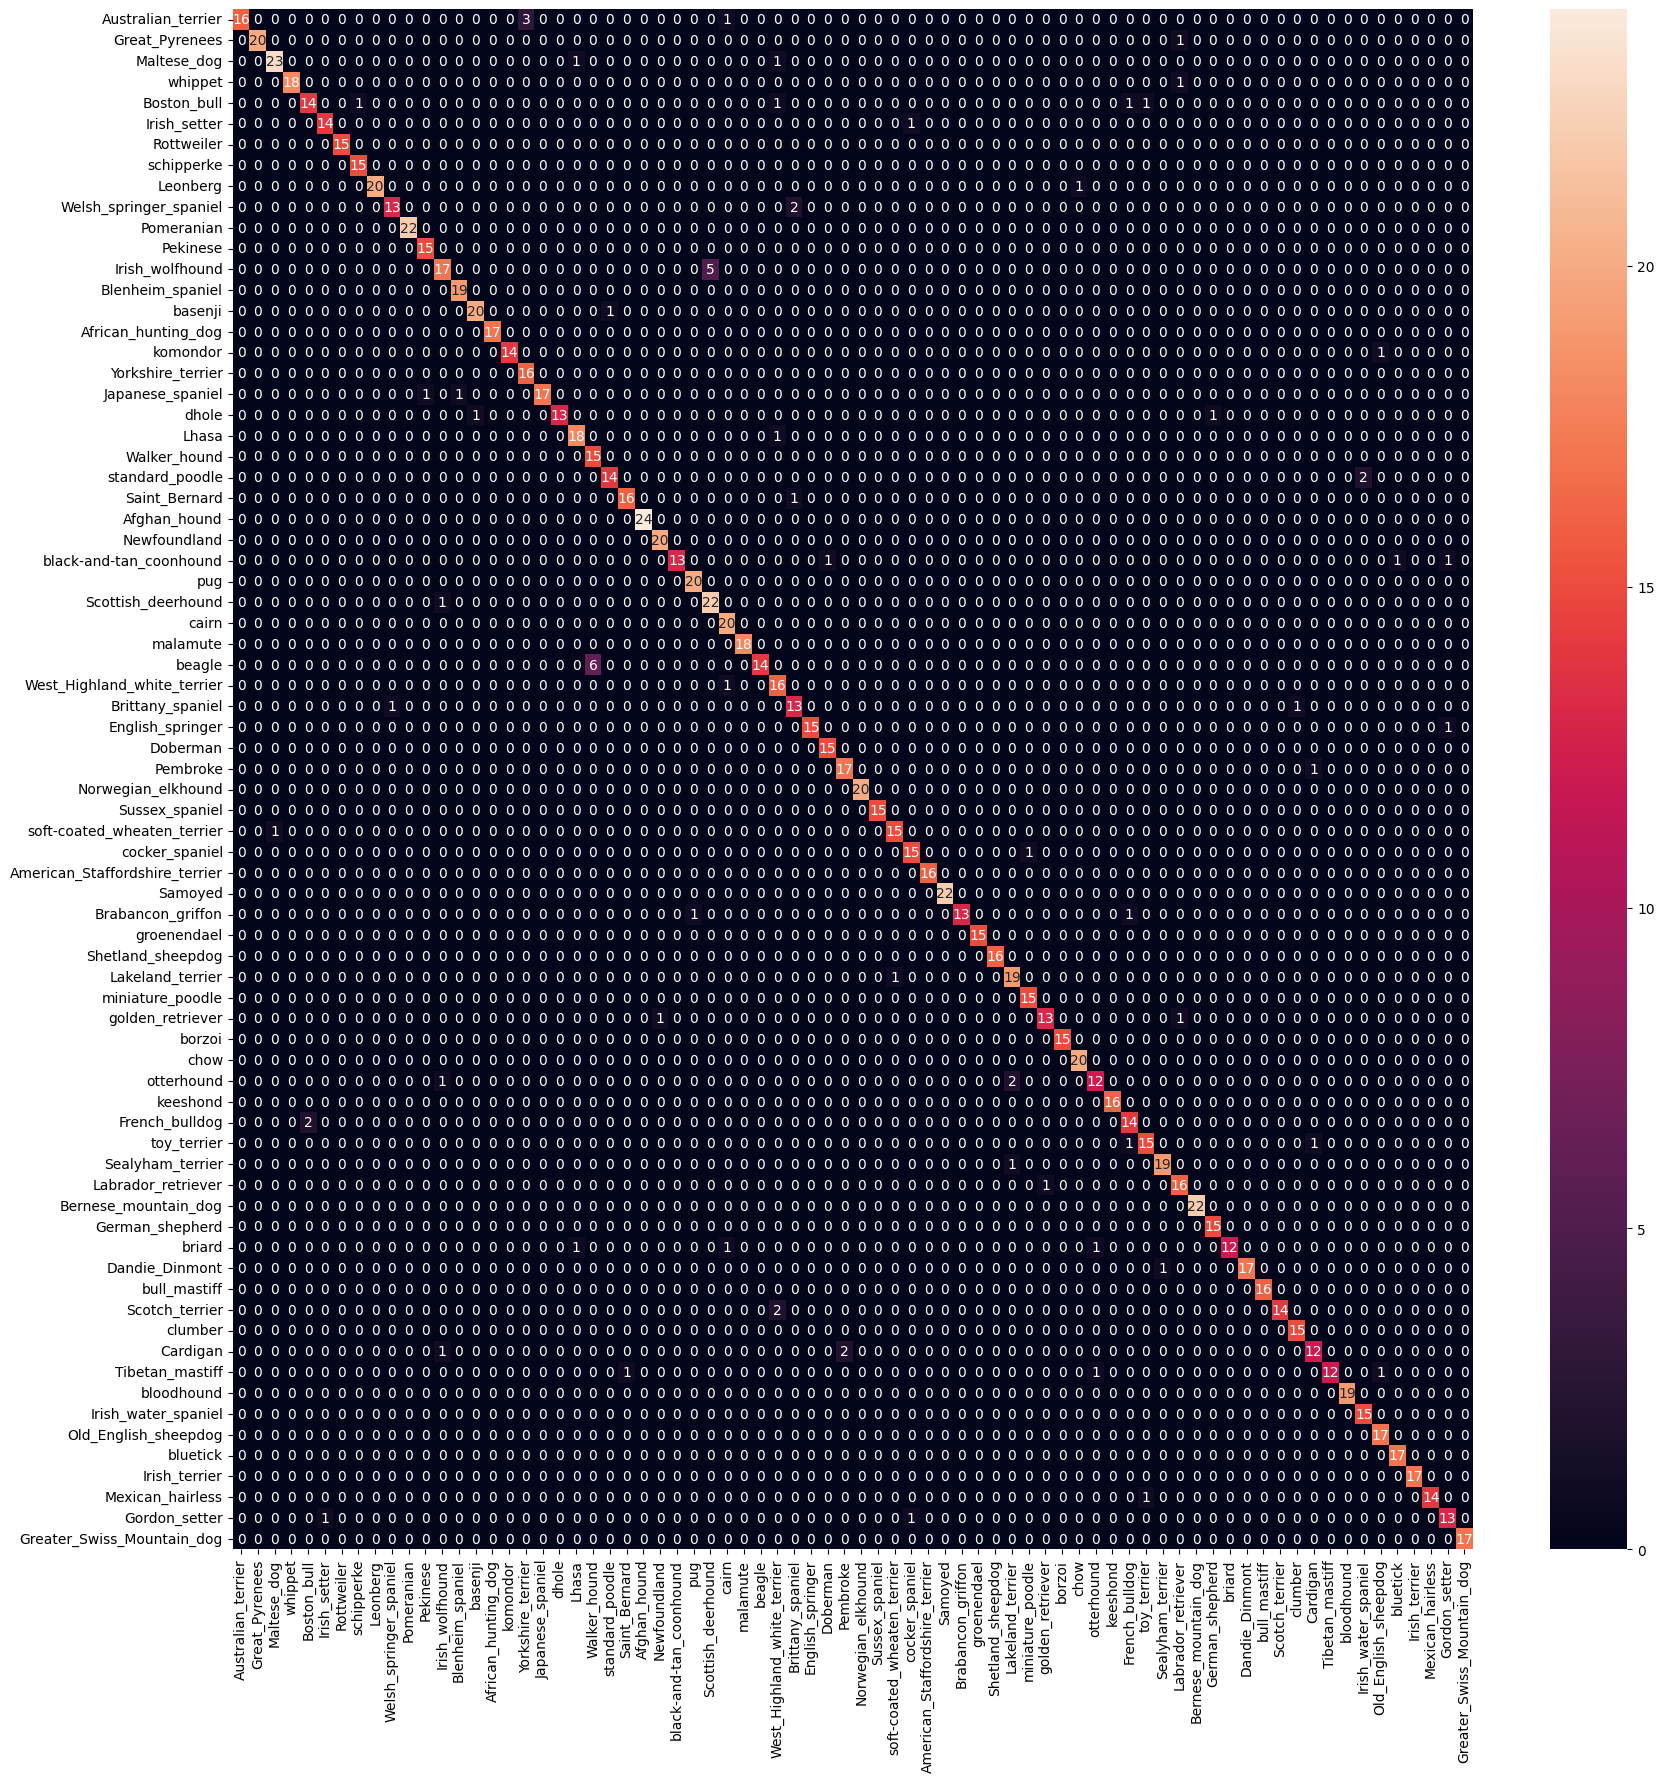

In [ ]:
# Visualizamos la matriz de confusion
predictions = model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=1)
y_true= y_test
confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)

df_cm=pd.DataFrame(confusion_matrix, index = [i for  i in classes], columns = [i for i in classes])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

---

For this exercise in which we have used the pre-trained Inception model and have added to it a Dropout layer and a dense layer with a softmax activation function, we can observe that the accuracy for training increases, while for validation it remains stable (Being high in both cases). Regarding the loss values, these decrease for both training and validation (obtaining considerably lower values ​​than in other models in both cases). It should be noted that the first epoch has a higher accuracy value for validation than for training, and a lower loss value for validation than for training, this happens because the metrics of the training set are obtained from the average of the results. of the batch, while the values ​​for validation are obtained once the epoch has ended.
<br>In reference to the confusion matrix, the diagonal in which true positives = predictive positives is perfectly displayed, obtaining very few errors.
<br>Due to what was described above, this is a model well adjusted to the data since we know that they are balanced and predicts any race with a low error.



---

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section8"></a>
## <font color="#00586D"> 8. Data augmentation</font>
<br>





In this section some of the preprocessing functions seen in the _data augmentation_ class should be applied. We will focus on stochastic *data augmentation* on the network obtained in the models section from 0 and try to improve performance. We are going to use one or more of the following modifications:

  *Horizontal Flip*Vertical flip
  *Contrast

The network architecture must be following:* Input size will be `(100, 120, 3)`.
*Convolutional layer with 32 kernels of size 5x5 with*ReLU*activation.* Layer *Max Pooling* with reduction of 2.
*Convolutional layer with 64 kernels of size 5x5 with*ReLU*activation.* Layer *Max Pooling* with reduction of 2.
*Layer*Fully connected*with 1024 neurons with*ReLU*activation.* Output layer with *softmax*.

Training settings:
*Loss function: `categorical_crossentropy`* Optimizer: `Adam`
*Learning rate: 0.001* Epochs: 10
* Batch size: 128

In [ ]:
# Cargamos datos con las funciones de generación de dataset
img_size = (100, 120, 3)
train_dataset = get_dataset(x_train, y_train, img_size[:-1], 128)
valid_dataset = get_dataset(x_valid, y_valid, img_size[:-1], 128)
test_dataset = get_dataset(x_test, y_test, img_size[:-1], 128)

In [ ]:
#   - Crear la red
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation="relu", input_shape=(100,120,3)),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
  tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dense(len(classes), activation="softmax")
])

In [ ]:
#   - Entrena la red
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
73/73 [==============================] - 51s 633ms/step - loss: 4.3805 - accuracy: 0.0260 - val_loss: 4.2407 - val_accuracy: 0.0302
Epoch 2/10
73/73 [==============================] - 40s 552ms/step - loss: 3.9432 - accuracy: 0.0801 - val_loss: 4.0371 - val_accuracy: 0.0655
Epoch 3/10
73/73 [==============================] - 42s 580ms/step - loss: 3.3133 - accuracy: 0.1958 - val_loss: 4.4054 - val_accuracy: 0.0586
Epoch 4/10
73/73 [==============================] - 40s 549ms/step - loss: 2.4352 - accuracy: 0.3885 - val_loss: 5.0723 - val_accuracy: 0.0500
Epoch 5/10
73/73 [==============================] - 42s 577ms/step - loss: 1.5194 - accuracy: 0.6130 - val_loss: 6.3115 - val_accuracy: 0.0573
Epoch 6/10
73/73 [==============================] - 42s 582ms/step - loss: 0.8288 - accuracy: 0.7886 - val_loss: 7.2531 - val_accuracy: 0.0672
Epoch 7/10
73/73 [==============================] - 40s 551ms/step - loss: 0.5464 - accuracy: 0.8616 - val_loss: 8.3752 - val_accuracy: 0.0689

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 96, 116, 32)       2432      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 48, 58, 32)       0         
 2D)                                                             
                                                                 
 conv2d_99 (Conv2D)          (None, 44, 54, 64)        51264     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 22, 27, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 38016)             0         
                                                                 
 dense_3 (Dense)             (None, 1024)              3

In [ ]:
#   - Evalúa la red
model.evaluate(test_dataset)

11/11 [==============================] - 6s 520ms/step - loss: 10.9825 - accuracy: 0.0659


[10.982475280761719, 0.06589147448539734]

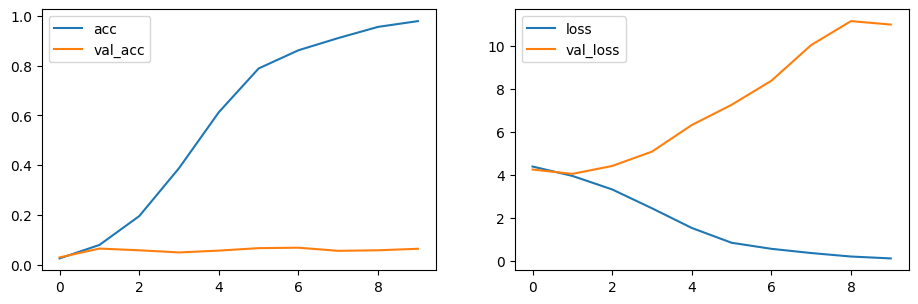

In [ ]:
# Visualizamos la evolución de los epochs
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# precision
fig.add_subplot(10, 10, 1)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.show()

11/11 [==============================] - 4s 359ms/step


<Axes: >

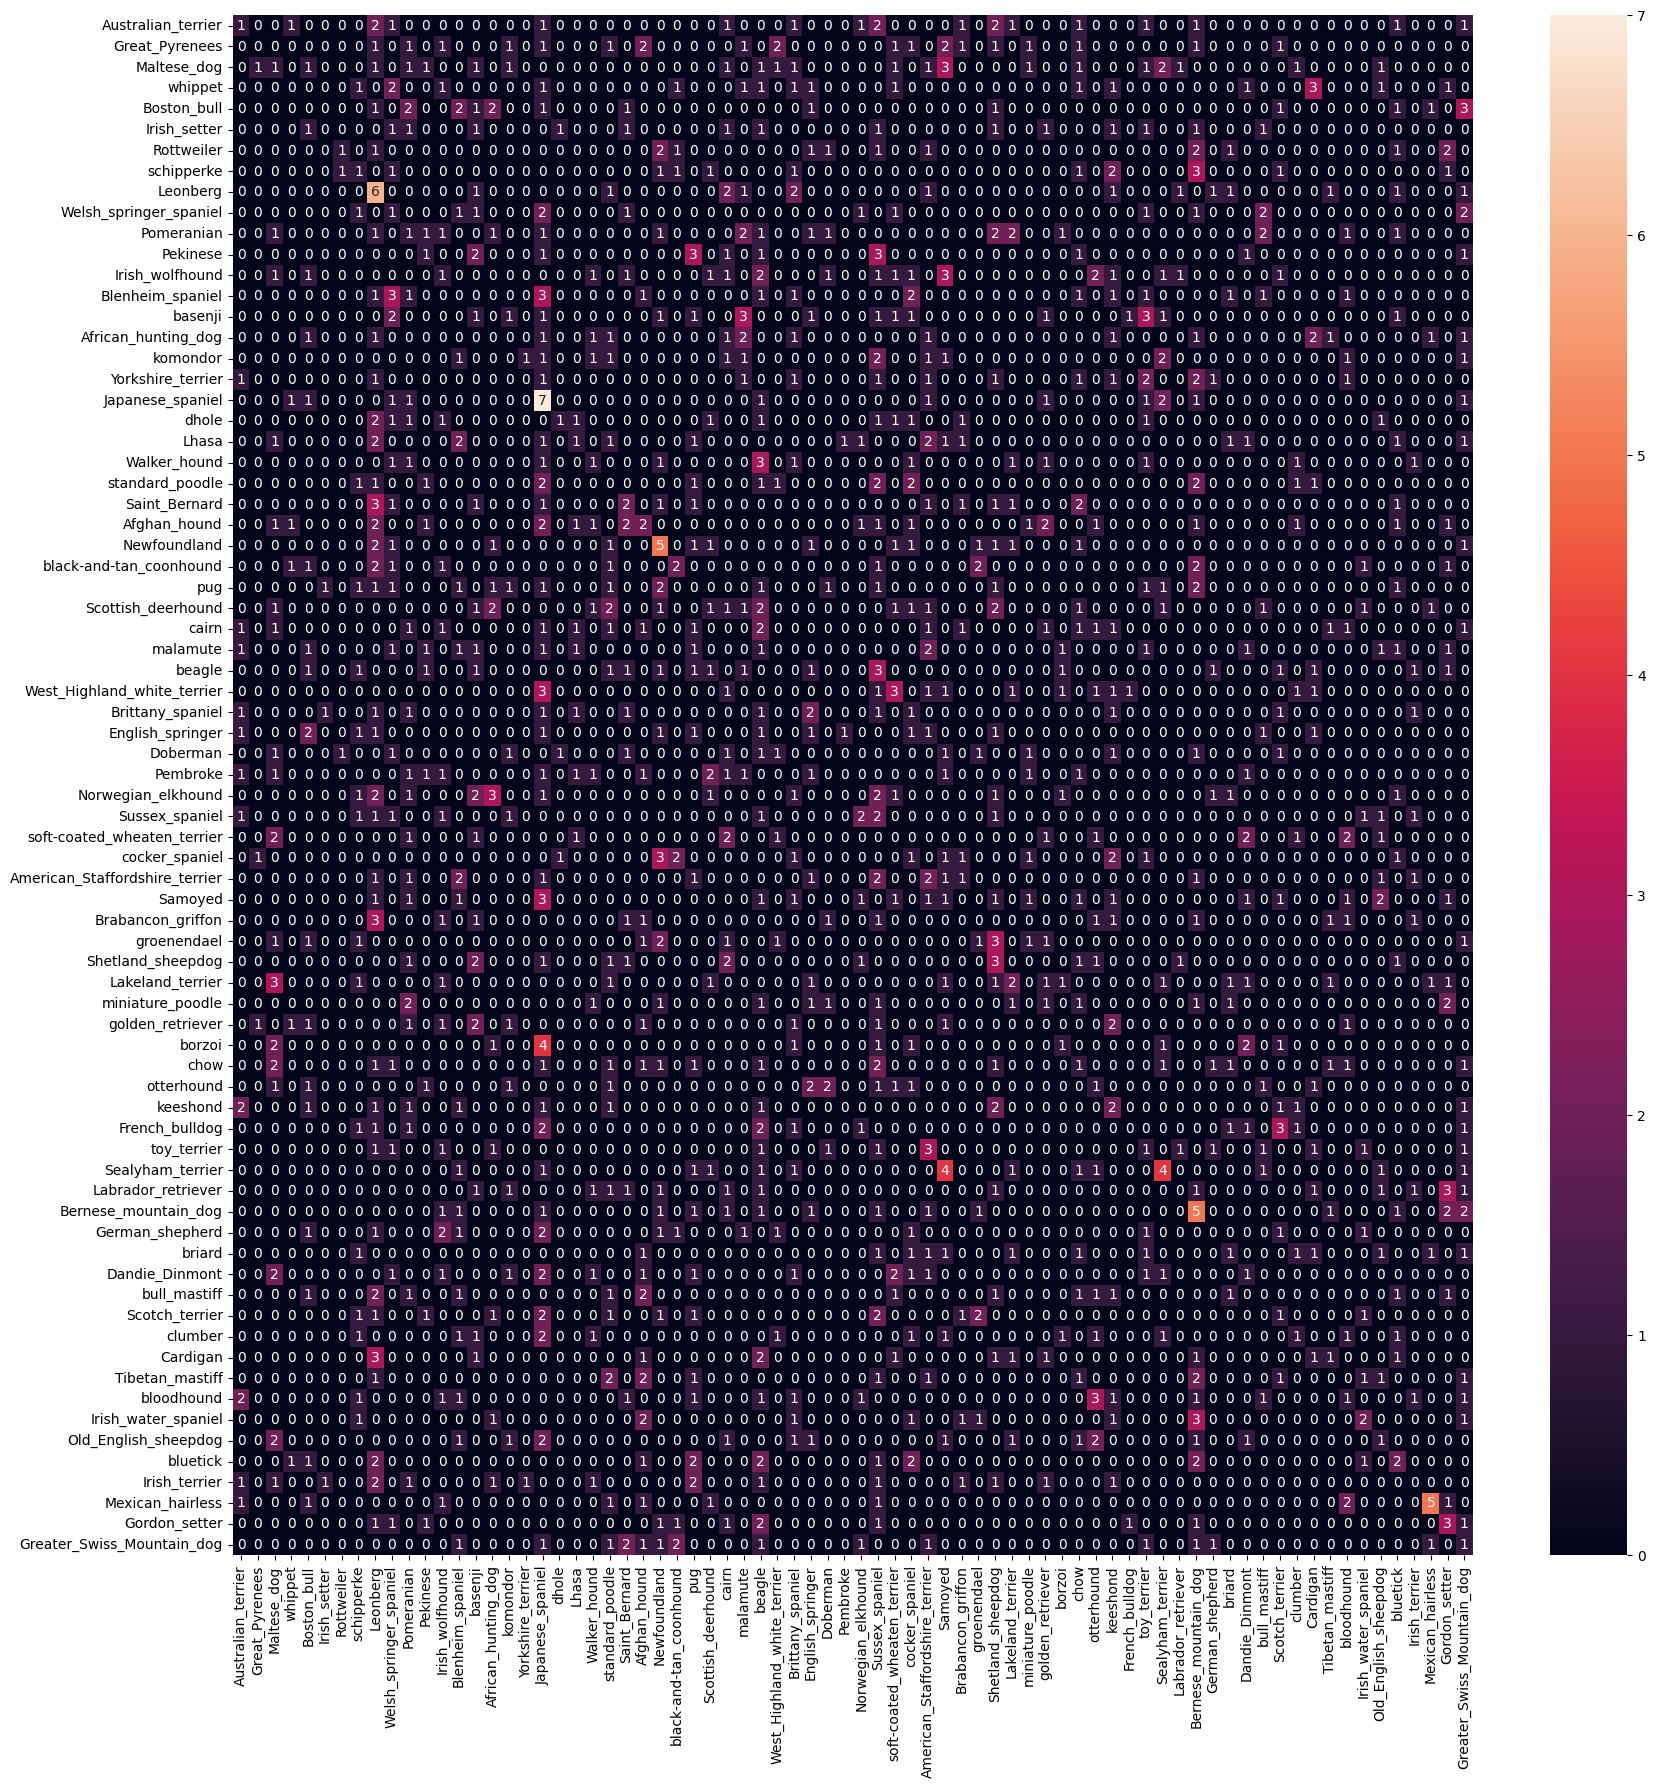

In [ ]:
# Visualizamos la matriz de confusion
predictions = model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=1)
y_true= y_test
confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)

df_cm=pd.DataFrame(confusion_matrix, index = [i for  i in classes], columns = [i for i in classes])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

We develop the model with Horizontal Flip

In [ ]:
# Cargamos datos con las funciones de generación de dataset
img_size = (100, 120, 3)
train_dataset = get_dataset(x_train, y_train, img_size[:-1], 128)
valid_dataset = get_dataset(x_valid, y_valid, img_size[:-1], 128)
test_dataset = get_dataset(x_test, y_test, img_size[:-1], 128)

In [ ]:
model = tf.keras.models.Sequential([

  tf.keras.layers.RandomFlip('horizontal'),

  tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation="relu", input_shape=(100,120,3)),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

  tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dense(len(classes), activation="softmax")
])

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
73/73 [==============================] - 45s 570ms/step - loss: 4.4047 - accuracy: 0.0227 - val_loss: 4.1549 - val_accuracy: 0.0461
Epoch 2/10
73/73 [==============================] - 38s 526ms/step - loss: 4.0151 - accuracy: 0.0635 - val_loss: 3.9871 - val_accuracy: 0.0616
Epoch 3/10
73/73 [==============================] - 40s 550ms/step - loss: 3.7485 - accuracy: 0.1033 - val_loss: 3.9040 - val_accuracy: 0.0763
Epoch 4/10
73/73 [==============================] - 40s 555ms/step - loss: 3.4938 - accuracy: 0.1581 - val_loss: 3.9328 - val_accuracy: 0.0883
Epoch 5/10
73/73 [==============================] - 40s 554ms/step - loss: 3.1930 - accuracy: 0.2277 - val_loss: 4.1385 - val_accuracy: 0.0801
Epoch 6/10
73/73 [==============================] - 42s 583ms/step - loss: 2.8524 - accuracy: 0.3082 - val_loss: 4.4044 - val_accuracy: 0.0784
Epoch 7/10
73/73 [==============================] - 40s 548ms/step - loss: 2.5055 - accuracy: 0.3911 - val_loss: 4.8566 - val_accuracy: 0.0758

In [ ]:
model.summary()
model.evaluate(test_dataset)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (None, 100, 120, 3)       0         
                                                                 
 conv2d_102 (Conv2D)         (None, 96, 116, 32)       2432      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 48, 58, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_103 (Conv2D)         (None, 44, 54, 64)        51264     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 22, 27, 64)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 38016)            

[5.998987197875977, 0.07441860437393188]

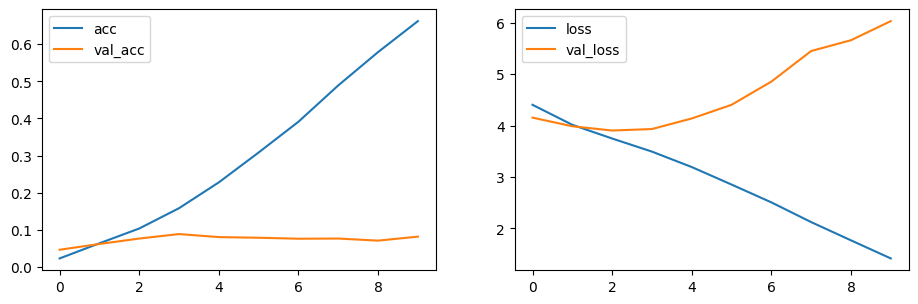

In [ ]:
# Visualizamos la evolución de los epochs
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# precision
fig.add_subplot(10, 10, 1)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.show()

11/11 [==============================] - 4s 358ms/step


<Axes: >

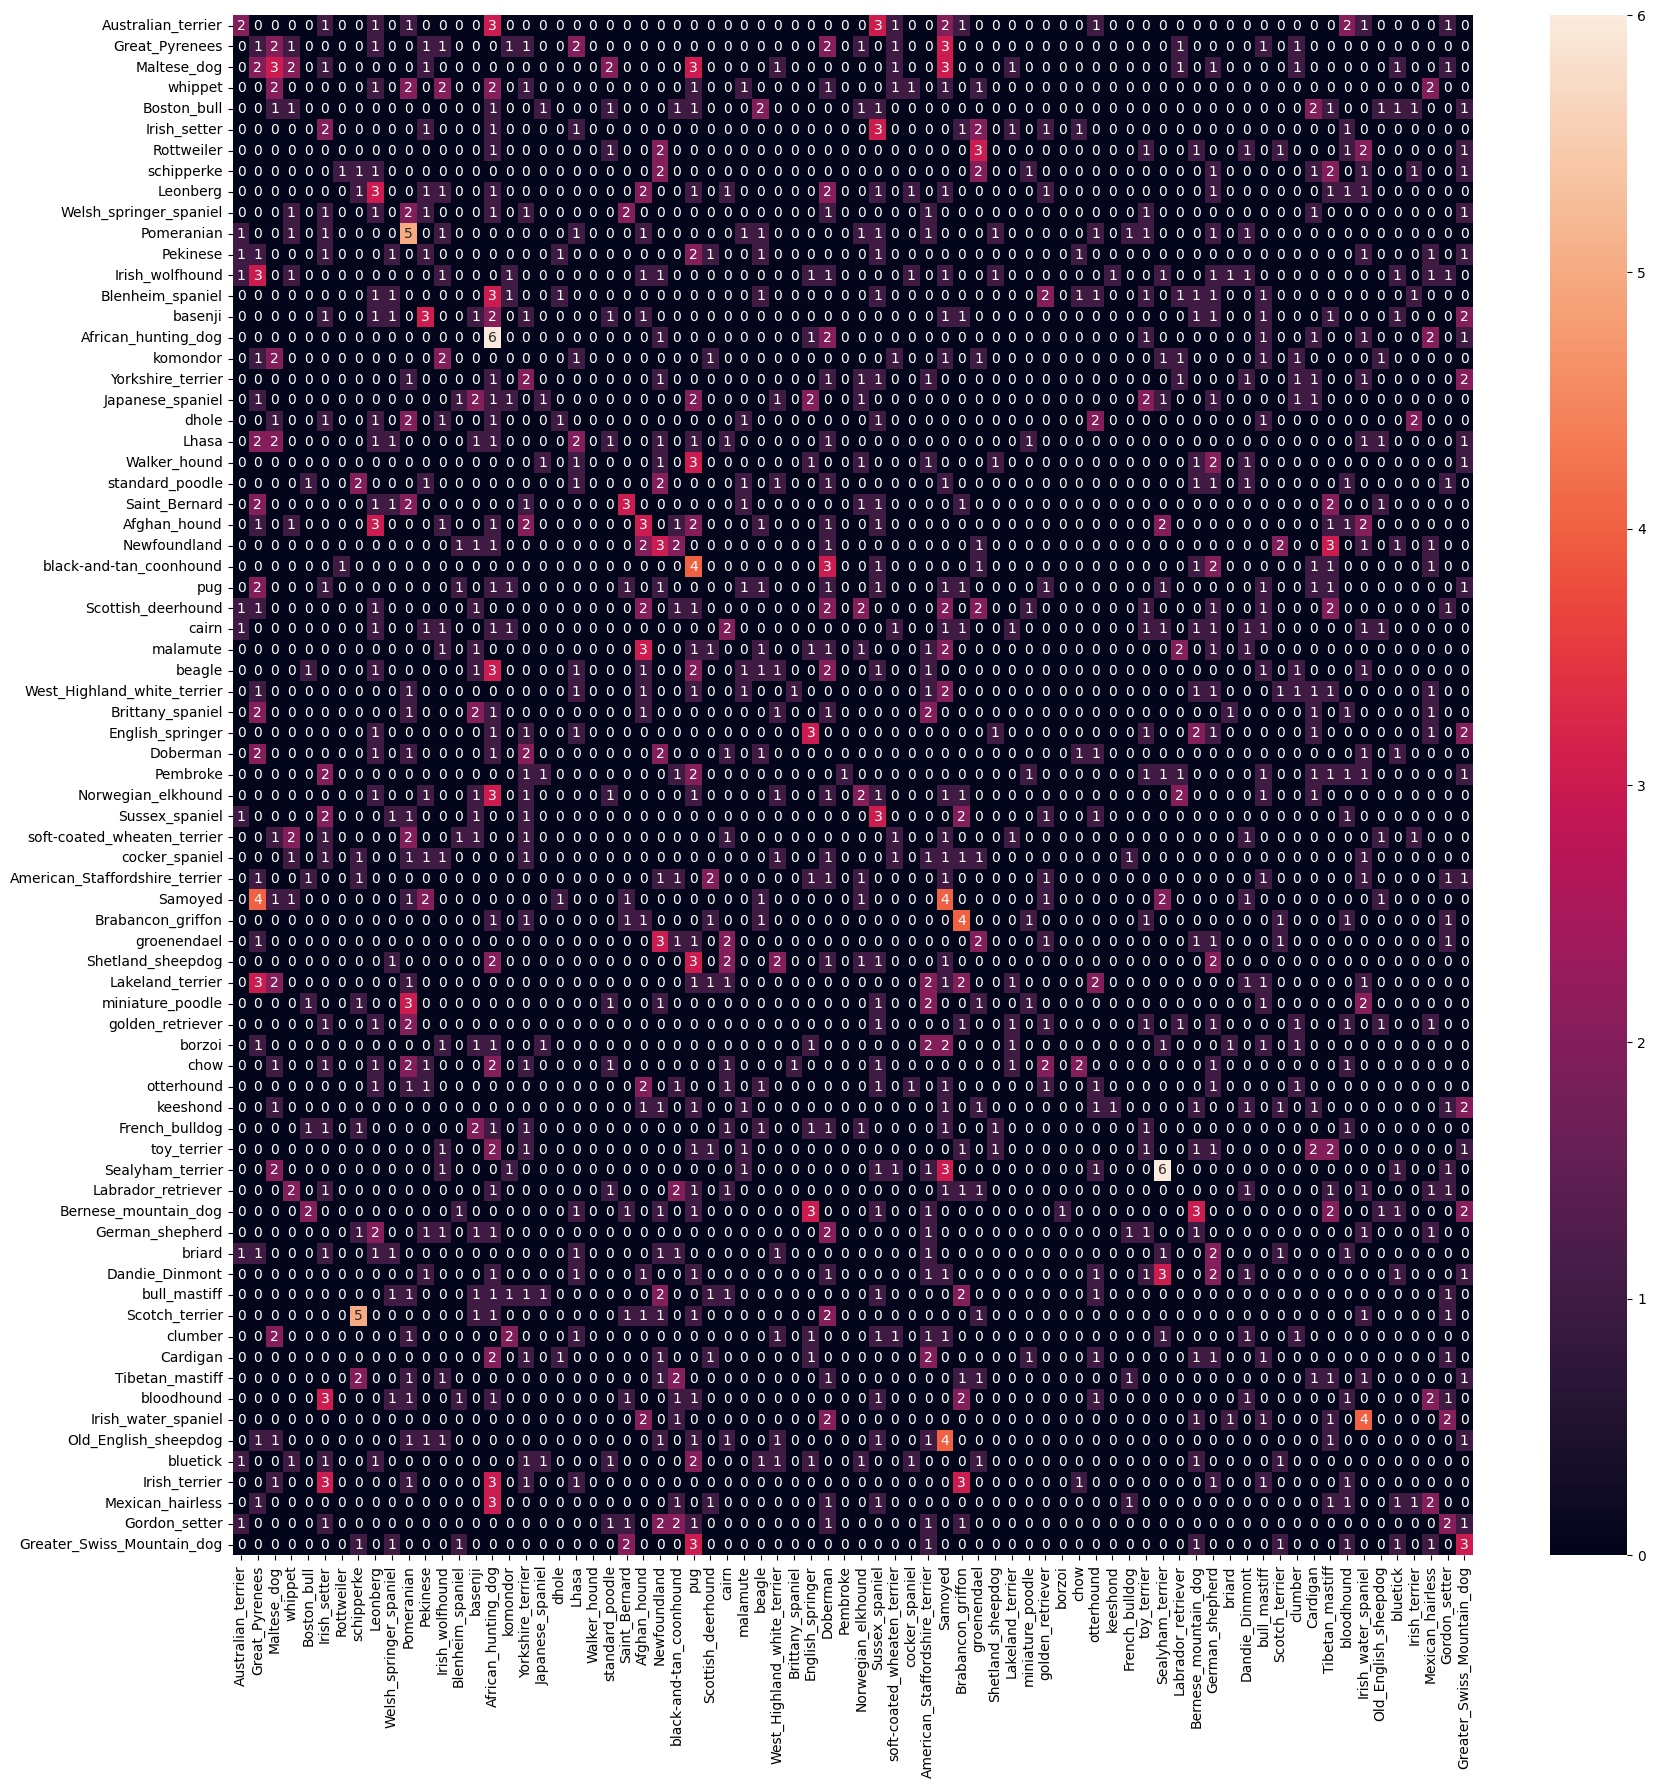

In [ ]:
# Visualizamos la matriz de confusion
predictions = model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=1)
y_true= y_test
confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)

df_cm=pd.DataFrame(confusion_matrix, index = [i for  i in classes], columns = [i for i in classes])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

We develop the model with vertical Flip

In [ ]:
# Cargamos datos con las funciones de generación de dataset
img_size = (100, 120, 3)
train_dataset = get_dataset(x_train, y_train, img_size[:-1], 128)
valid_dataset = get_dataset(x_valid, y_valid, img_size[:-1], 128)
test_dataset = get_dataset(x_test, y_test, img_size[:-1], 128)

In [ ]:
model = tf.keras.models.Sequential([

  tf.keras.layers.RandomFlip('vertical'),

  tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation="relu", input_shape=(100,120,3)),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

  tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dense(len(classes), activation="softmax")
])

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
73/73 [==============================] - 43s 564ms/step - loss: 4.3818 - accuracy: 0.0207 - val_loss: 4.2733 - val_accuracy: 0.0336
Epoch 2/10
73/73 [==============================] - 41s 561ms/step - loss: 4.1680 - accuracy: 0.0445 - val_loss: 4.1449 - val_accuracy: 0.0319
Epoch 3/10
73/73 [==============================] - 43s 585ms/step - loss: 3.9290 - accuracy: 0.0883 - val_loss: 4.2014 - val_accuracy: 0.0435
Epoch 4/10
73/73 [==============================] - 40s 553ms/step - loss: 3.6213 - accuracy: 0.1529 - val_loss: 4.3043 - val_accuracy: 0.0530
Epoch 5/10
73/73 [==============================] - 43s 588ms/step - loss: 3.1868 - accuracy: 0.2551 - val_loss: 4.6236 - val_accuracy: 0.0422
Epoch 6/10
73/73 [==============================] - 39s 531ms/step - loss: 2.6371 - accuracy: 0.3983 - val_loss: 5.0659 - val_accuracy: 0.0405
Epoch 7/10
73/73 [==============================] - 42s 581ms/step - loss: 2.1465 - accuracy: 0.5057 - val_loss: 5.5034 - val_accuracy: 0.0513

In [ ]:
model.summary()
model.evaluate(test_dataset)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_3 (RandomFlip)  (None, 100, 120, 3)       0         
                                                                 
 conv2d_104 (Conv2D)         (None, 96, 116, 32)       2432      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 48, 58, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_105 (Conv2D)         (None, 44, 54, 64)        51264     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 22, 27, 64)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 38016)            

[6.692942142486572, 0.05426356568932533]

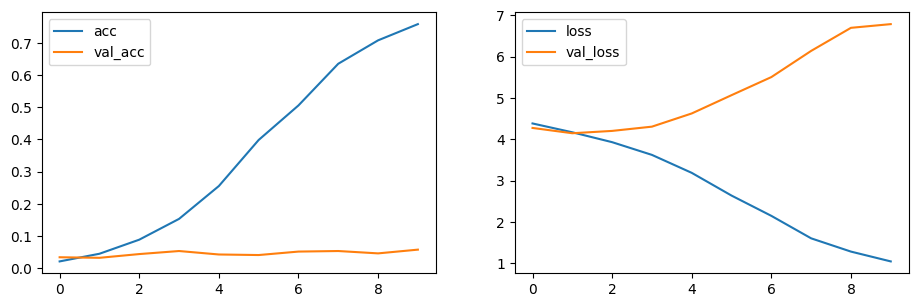

In [ ]:
# Visualizamos la evolución de los epochs
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# precision
fig.add_subplot(10, 10, 1)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.show()

11/11 [==============================] - 6s 511ms/step


<Axes: >

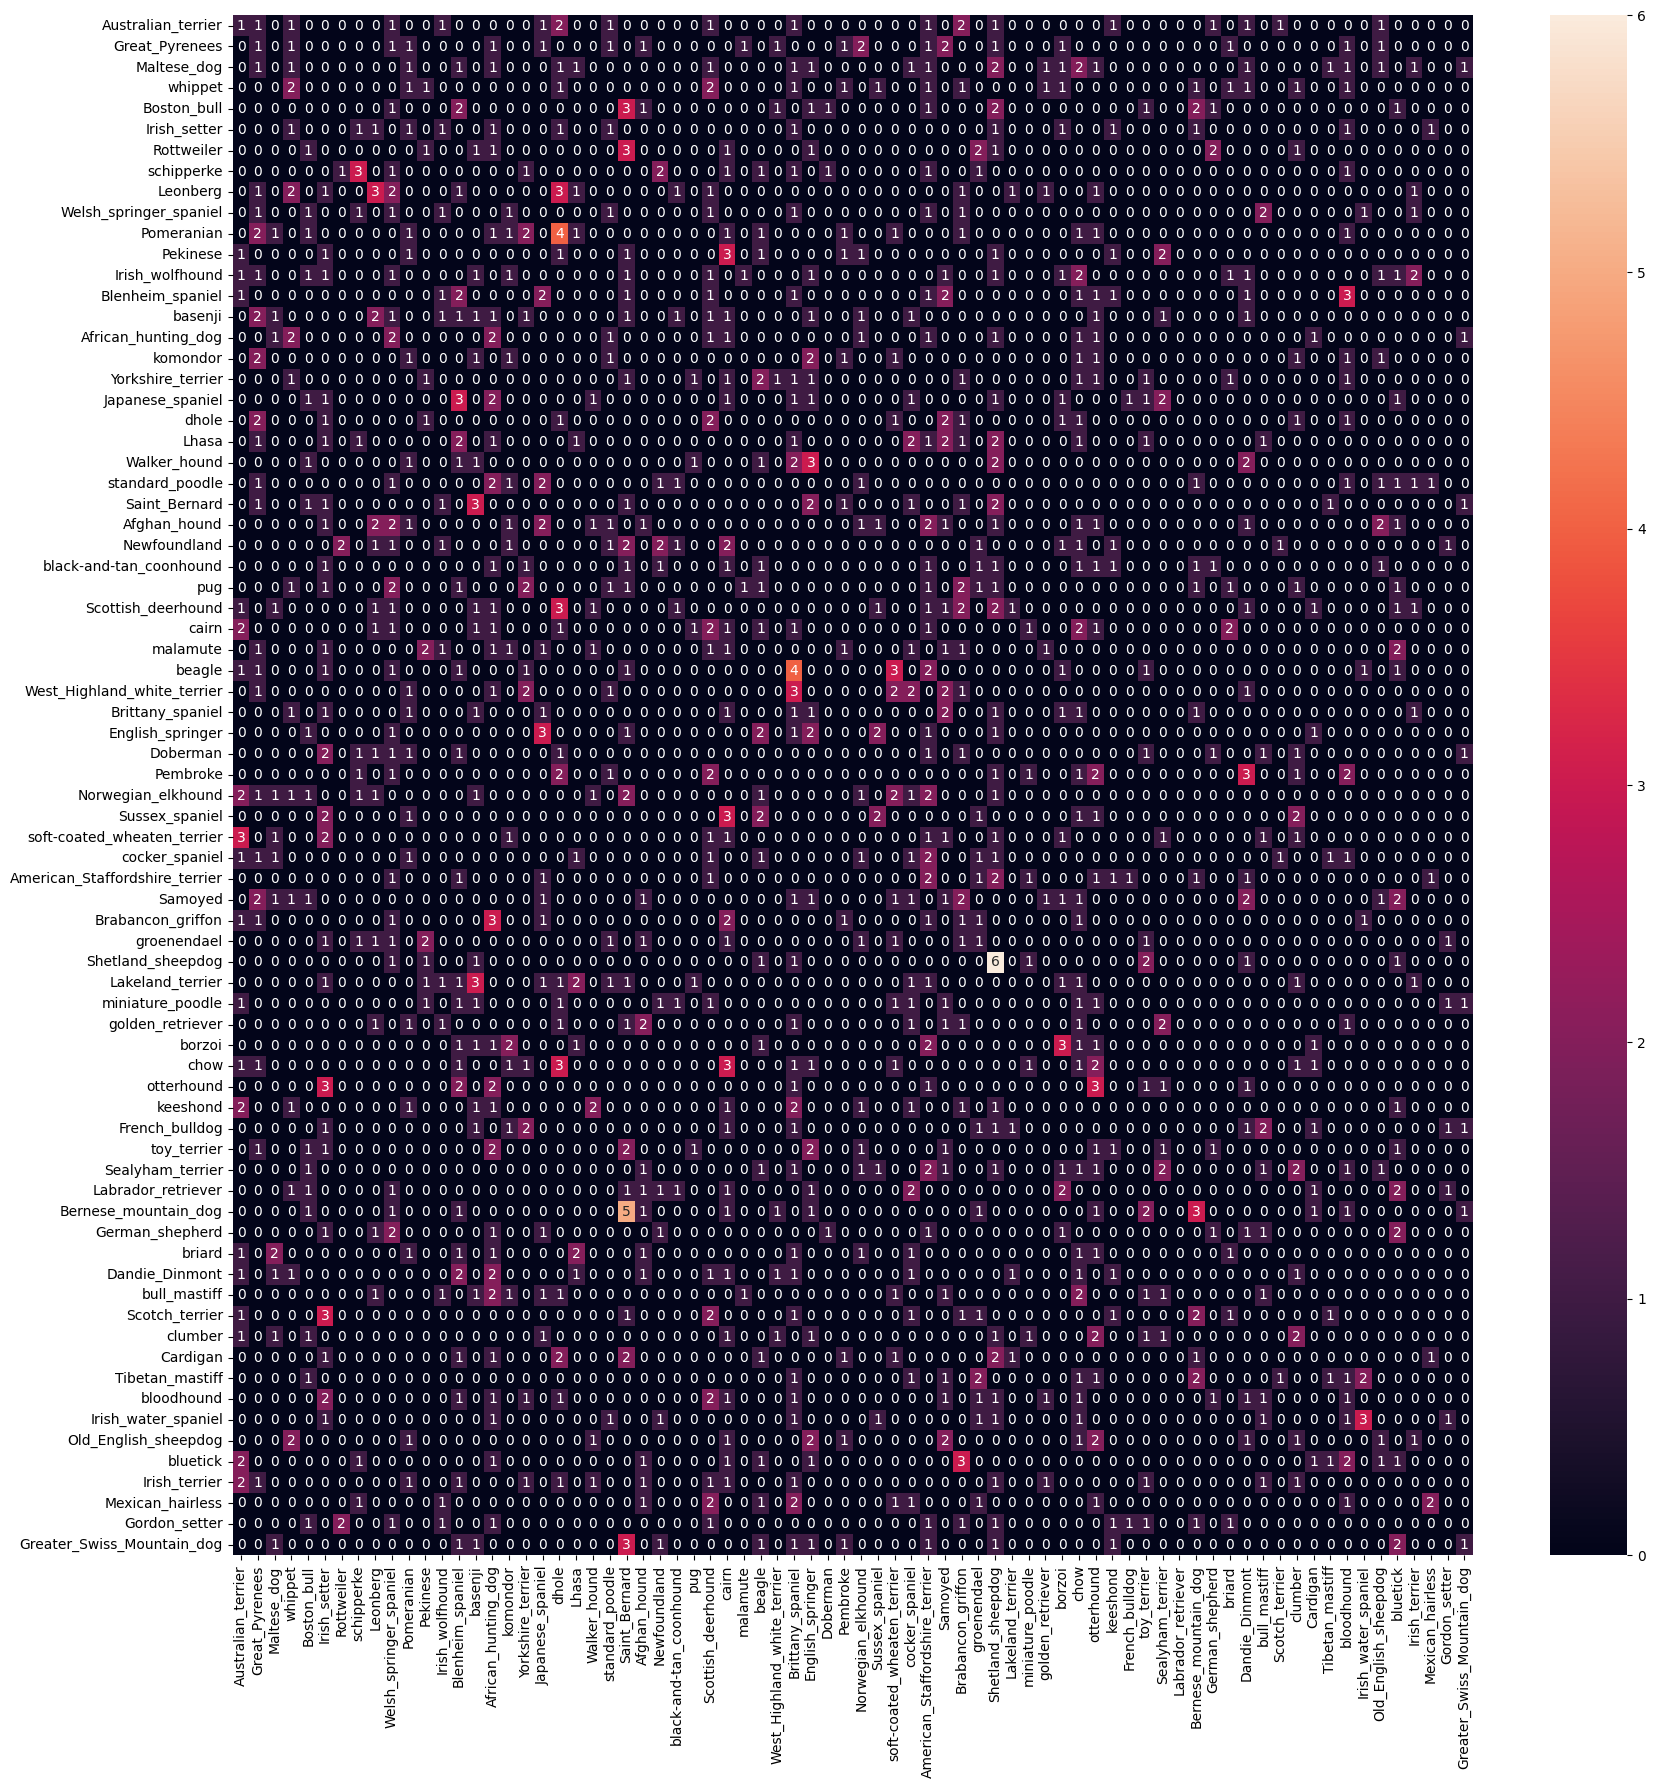

In [ ]:
# Visualizamos la matriz de confusion
predictions = model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=1)
y_true= y_test
confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)

df_cm=pd.DataFrame(confusion_matrix, index = [i for  i in classes], columns = [i for i in classes])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

We add 0.2 contrast

In [ ]:
# Cargamos datos con las funciones de generación de dataset
img_size = (100, 120, 3)
train_dataset = get_dataset(x_train, y_train, img_size[:-1], 128)
valid_dataset = get_dataset(x_valid, y_valid, img_size[:-1], 128)
test_dataset = get_dataset(x_test, y_test, img_size[:-1], 128)

In [ ]:
model = tf.keras.models.Sequential([

  tf.keras.layers.RandomBrightness(0.2),

  tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation="relu", input_shape=(100,120,3)),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

  tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dense(len(classes), activation="softmax")
])

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
73/73 [==============================] - 41s 537ms/step - loss: 5.9798 - accuracy: 0.0147 - val_loss: 4.3020 - val_accuracy: 0.0198
Epoch 2/10
73/73 [==============================] - 38s 528ms/step - loss: 4.3090 - accuracy: 0.0193 - val_loss: 4.2994 - val_accuracy: 0.0198
Epoch 3/10
73/73 [==============================] - 44s 604ms/step - loss: 4.2986 - accuracy: 0.0189 - val_loss: 4.2974 - val_accuracy: 0.0198
Epoch 4/10
73/73 [==============================] - 51s 708ms/step - loss: 4.2977 - accuracy: 0.0191 - val_loss: 4.2955 - val_accuracy: 0.0198
Epoch 5/10
73/73 [==============================] - 53s 725ms/step - loss: 4.2965 - accuracy: 0.0189 - val_loss: 4.2947 - val_accuracy: 0.0198
Epoch 6/10
73/73 [==============================] - 48s 662ms/step - loss: 4.3029 - accuracy: 0.0196 - val_loss: 4.2944 - val_accuracy: 0.0198
Epoch 7/10
73/73 [==============================] - 51s 702ms/step - loss: 4.3055 - accuracy: 0.0173 - val_loss: 4.2940 - val_accuracy: 0.0198

In [ ]:
model.summary()
model.evaluate(test_dataset)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_brightness (RandomBr  (None, 100, 120, 3)      0         
 ightness)                                                       
                                                                 
 conv2d_106 (Conv2D)         (None, 96, 116, 32)       2432      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 48, 58, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_107 (Conv2D)         (None, 44, 54, 64)        51264     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 22, 27, 64)       0         
 g2D)                                                            
                                                      

[4.2935686111450195, 0.01937984488904476]

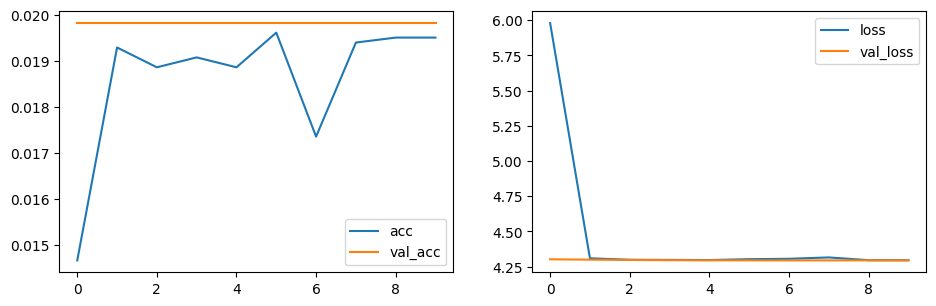

In [ ]:
# Visualizamos la evolución de los epochs
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# precision
fig.add_subplot(10, 10, 1)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.show()

11/11 [==============================] - 6s 460ms/step


<Axes: >

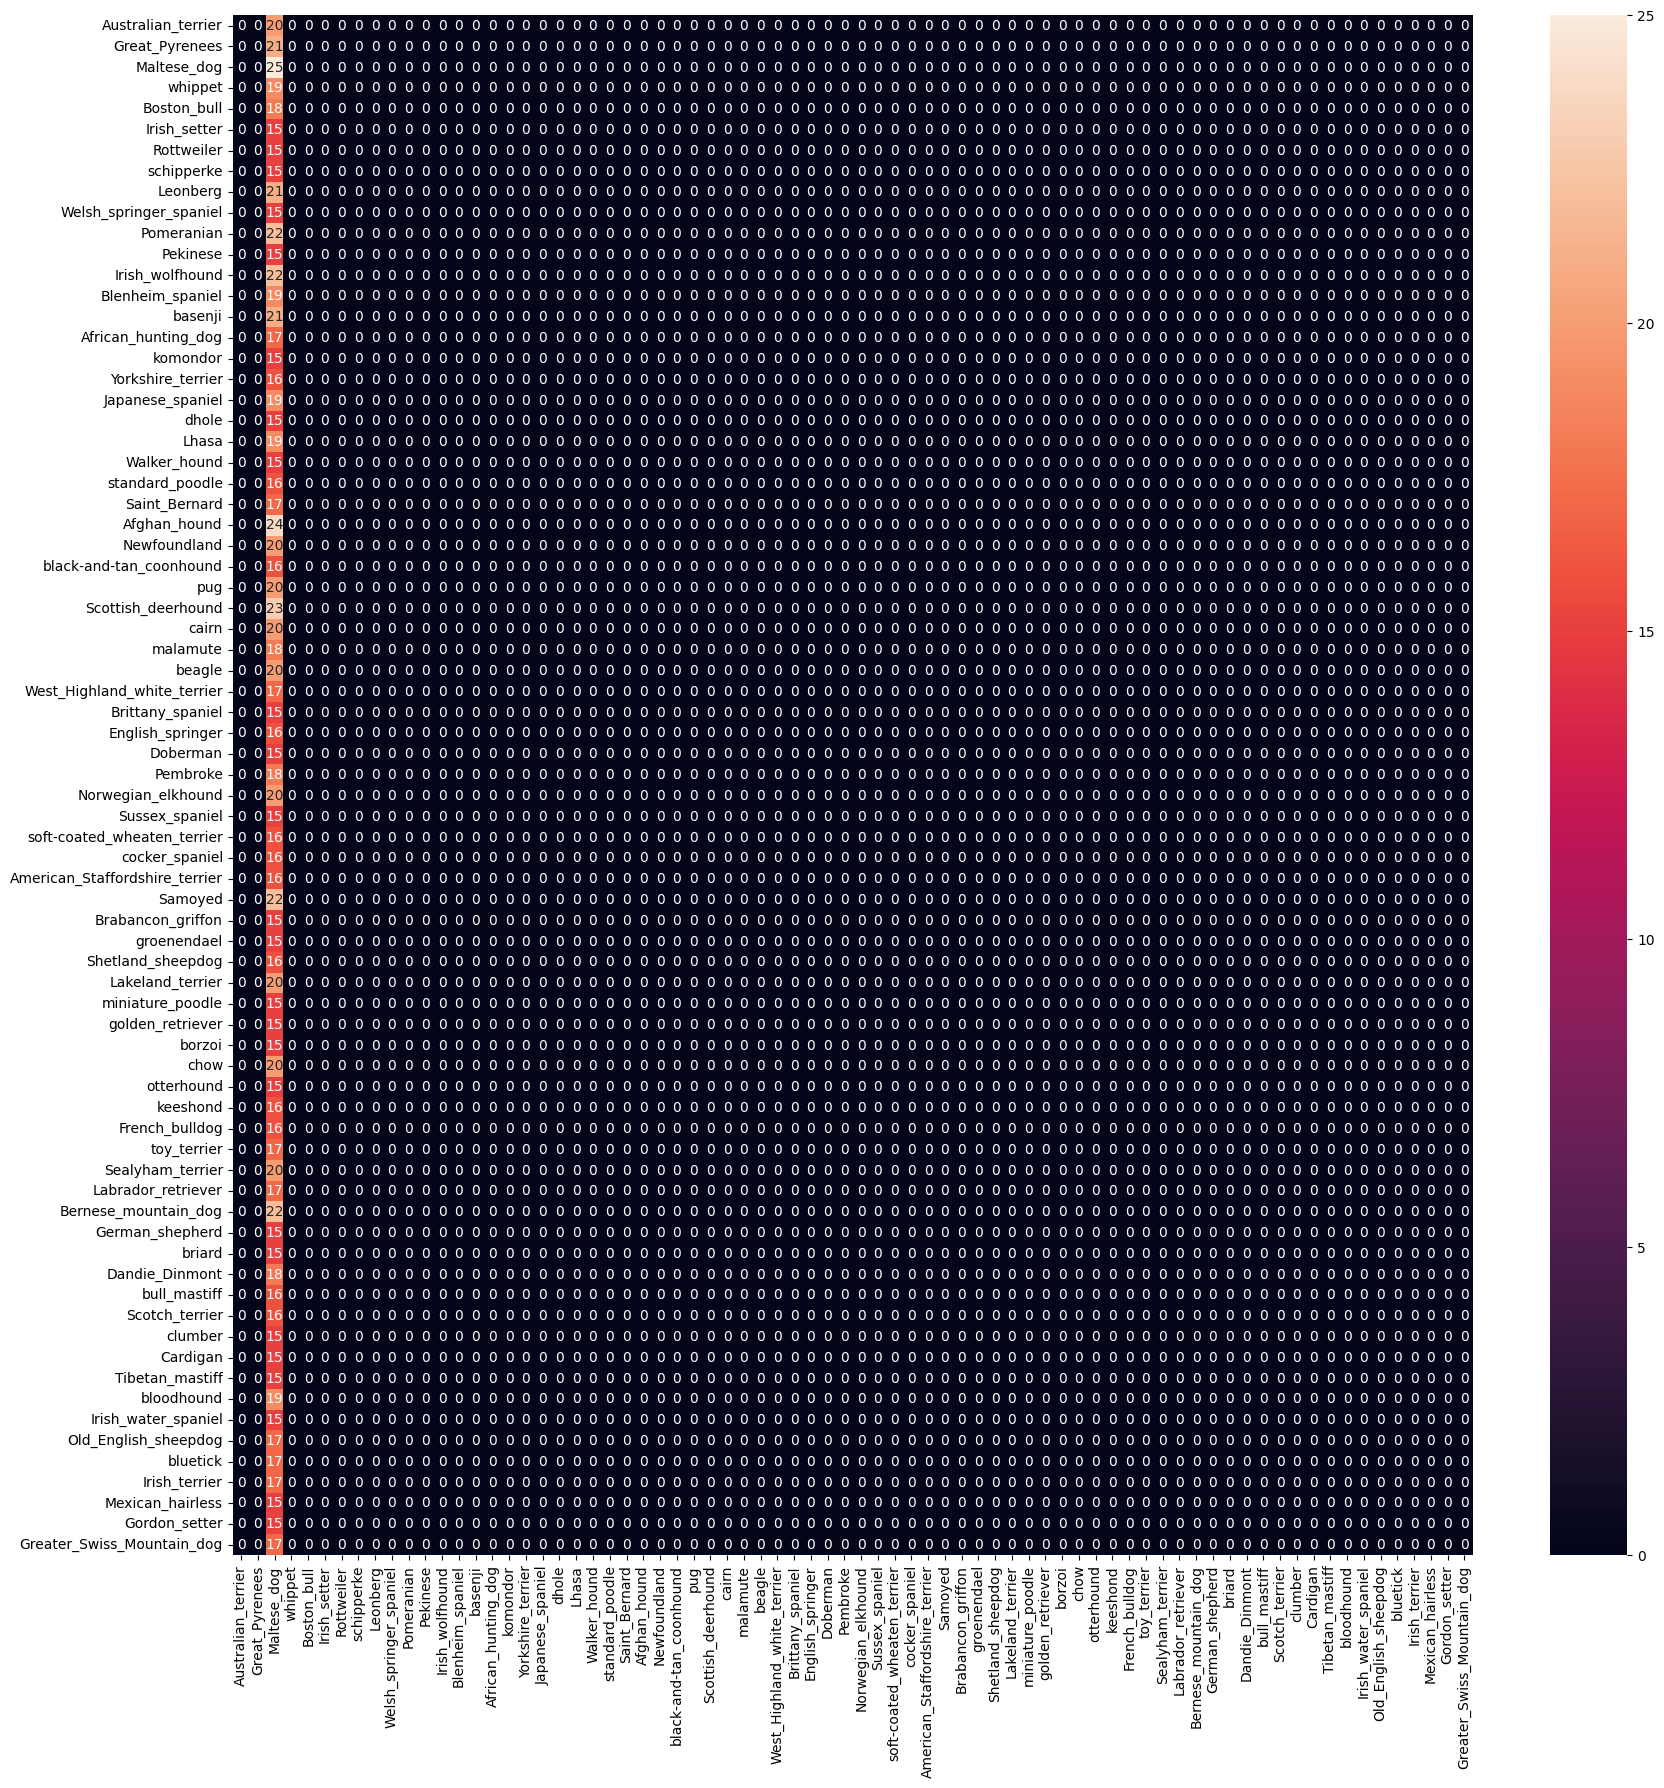

In [ ]:
# Visualizamos la matriz de confusion
predictions = model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=1)
y_true= y_test
confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)

df_cm=pd.DataFrame(confusion_matrix, index = [i for  i in classes], columns = [i for i in classes])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

We added Horizontal Flip + Vertical Flip

In [ ]:
# Cargamos datos con las funciones de generación de dataset
img_size = (100, 120, 3)
train_dataset = get_dataset(x_train, y_train, img_size[:-1], 128)
valid_dataset = get_dataset(x_valid, y_valid, img_size[:-1], 128)
test_dataset = get_dataset(x_test, y_test, img_size[:-1], 128)

In [ ]:
model = tf.keras.models.Sequential([

  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomFlip('vertical'),

  tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation="relu", input_shape=(100,120,3)),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

  tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dense(len(classes), activation="softmax")
])

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
73/73 [==============================] - 47s 606ms/step - loss: 4.3412 - accuracy: 0.0210 - val_loss: 4.2589 - val_accuracy: 0.0302
Epoch 2/10
73/73 [==============================] - 40s 553ms/step - loss: 4.1786 - accuracy: 0.0366 - val_loss: 4.1594 - val_accuracy: 0.0409
Epoch 3/10
73/73 [==============================] - 42s 575ms/step - loss: 4.0367 - accuracy: 0.0570 - val_loss: 4.1326 - val_accuracy: 0.0461
Epoch 4/10
73/73 [==============================] - 42s 582ms/step - loss: 3.8998 - accuracy: 0.0833 - val_loss: 4.1131 - val_accuracy: 0.0491
Epoch 5/10
73/73 [==============================] - 39s 539ms/step - loss: 3.7526 - accuracy: 0.1177 - val_loss: 4.2533 - val_accuracy: 0.0422
Epoch 6/10
73/73 [==============================] - 39s 534ms/step - loss: 3.5763 - accuracy: 0.1588 - val_loss: 4.2944 - val_accuracy: 0.0461
Epoch 7/10
73/73 [==============================] - 39s 541ms/step - loss: 3.4282 - accuracy: 0.2043 - val_loss: 4.3558 - val_accuracy: 0.0595

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 100, 120, 3)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 100, 120, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 116, 32)       2432      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 58, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 44, 54, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 27, 64)       0         
 2D)                                                    

In [ ]:
model.evaluate(test_dataset)

11/11 [==============================] - 5s 408ms/step - loss: 4.6976 - accuracy: 0.0597


[4.69761848449707, 0.059689924120903015]

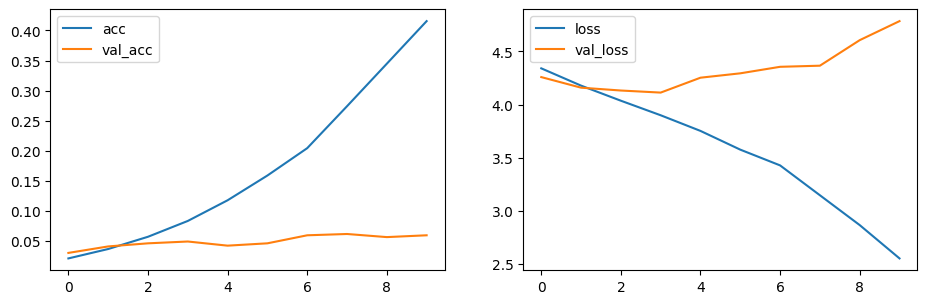

In [ ]:
# Visualizamos la evolución de los epochs
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# precision
fig.add_subplot(10, 10, 1)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.show()

11/11 [==============================] - 4s 349ms/step


<Axes: >

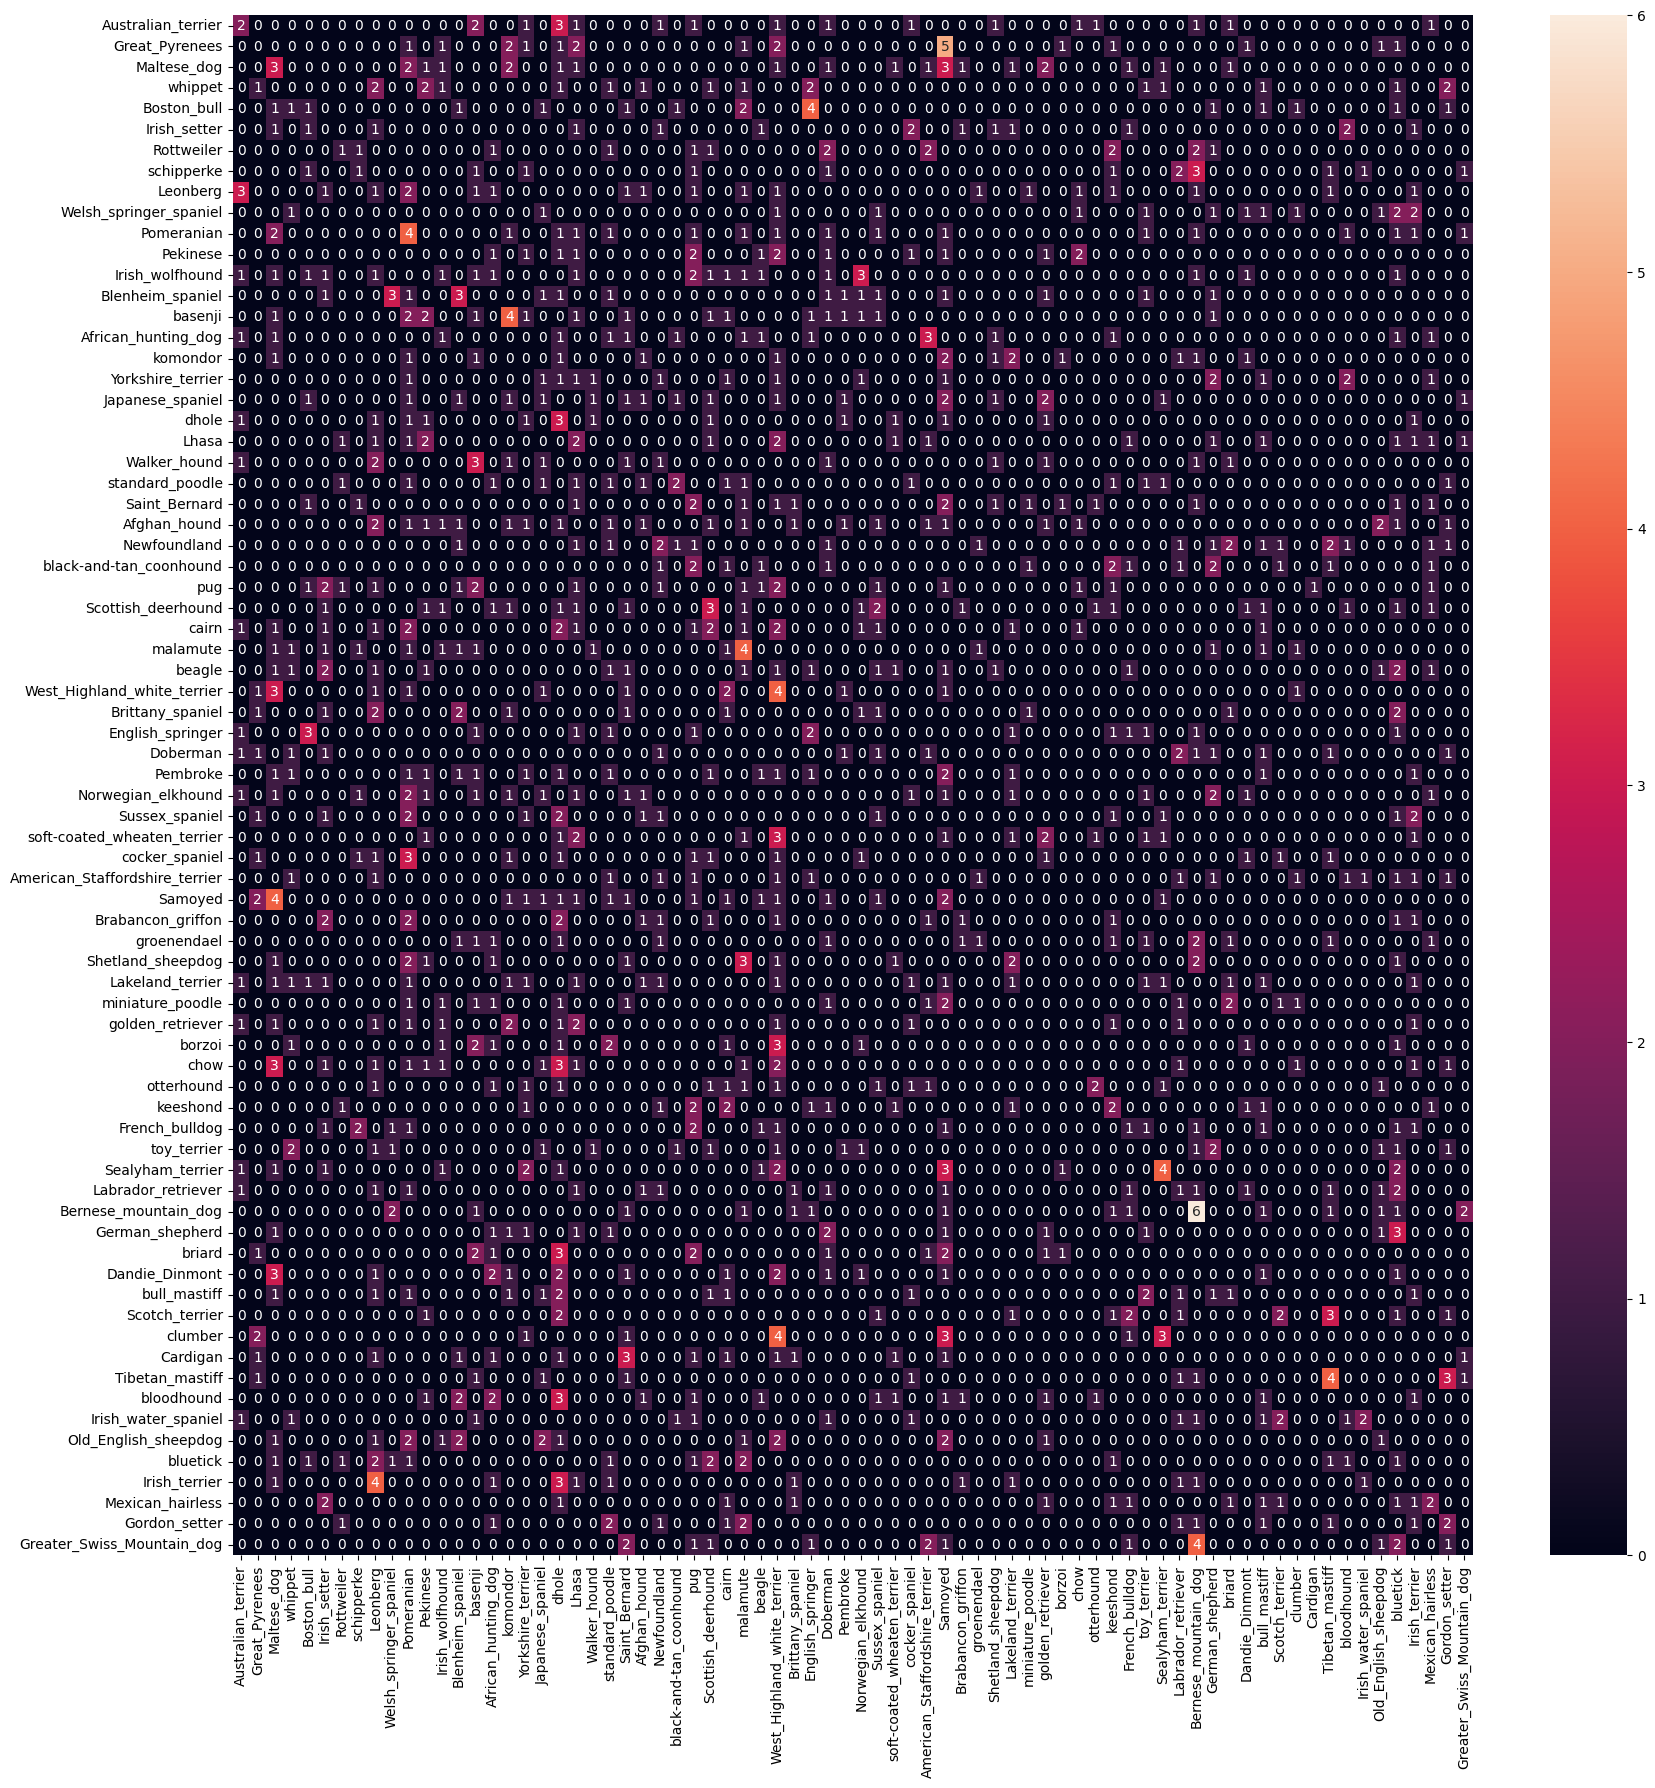

In [ ]:
# Visualizamos la matriz de confusion
predictions = model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=1)
y_true= y_test
confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)

df_cm=pd.DataFrame(confusion_matrix, index = [i for  i in classes], columns = [i for i in classes])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

Vertical Flip + Contrast 0.2

In [ ]:
# Cargamos datos con las funciones de generación de dataset
img_size = (100, 120, 3)
train_dataset = get_dataset(x_train, y_train, img_size[:-1], 128)
valid_dataset = get_dataset(x_valid, y_valid, img_size[:-1], 128)
test_dataset = get_dataset(x_test, y_test, img_size[:-1], 128)

In [ ]:
model = tf.keras.models.Sequential([

  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomBrightness(0.2),

  tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation="relu", input_shape=(100,120,3)),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

  tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dense(len(classes), activation="softmax")
])

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
73/73 [==============================] - 43s 563ms/step - loss: 5.7120 - accuracy: 0.0145 - val_loss: 4.3004 - val_accuracy: 0.0220
Epoch 2/10
73/73 [==============================] - 39s 542ms/step - loss: 4.3026 - accuracy: 0.0195 - val_loss: 4.2984 - val_accuracy: 0.0198
Epoch 3/10
73/73 [==============================] - 42s 573ms/step - loss: 4.2988 - accuracy: 0.0191 - val_loss: 4.2954 - val_accuracy: 0.0198
Epoch 4/10
73/73 [==============================] - 54s 743ms/step - loss: 4.6125 - accuracy: 0.0194 - val_loss: 4.2946 - val_accuracy: 0.0198
Epoch 5/10
73/73 [==============================] - 65s 880ms/step - loss: 4.5187 - accuracy: 0.0196 - val_loss: 4.2939 - val_accuracy: 0.0198
Epoch 6/10
73/73 [==============================] - 63s 864ms/step - loss: 4.2958 - accuracy: 0.0195 - val_loss: 4.2918 - val_accuracy: 0.0190
Epoch 7/10
73/73 [==============================] - 40s 546ms/step - loss: 4.9160 - accuracy: 0.0195 - val_loss: 4.2937 - val_accuracy: 0.0198

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (None, 100, 120, 3)       0         
                                                                 
 random_brightness (RandomBr  (None, 100, 120, 3)      0         
 ightness)                                                       
                                                                 
 conv2d_4 (Conv2D)           (None, 96, 116, 32)       2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 58, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 54, 64)        51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 22, 27, 64)      

In [ ]:
model.evaluate(test_dataset)

11/11 [==============================] - 4s 346ms/step - loss: 4.2858 - accuracy: 0.0233


[4.285764694213867, 0.023255813866853714]

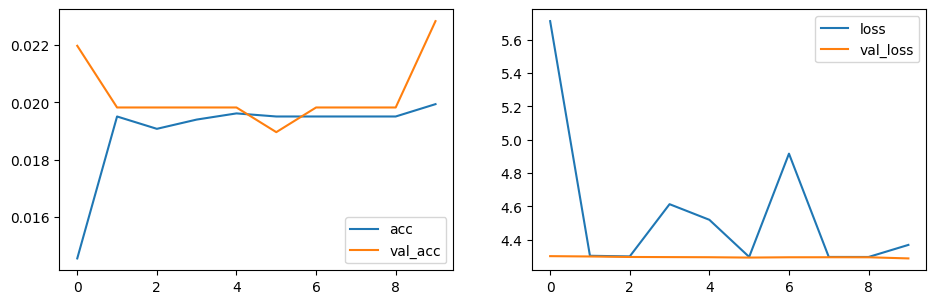

In [ ]:
# Visualizamos la evolución de los epochs
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# precision
fig.add_subplot(10, 10, 1)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.show()

11/11 [==============================] - 6s 494ms/step


<Axes: >

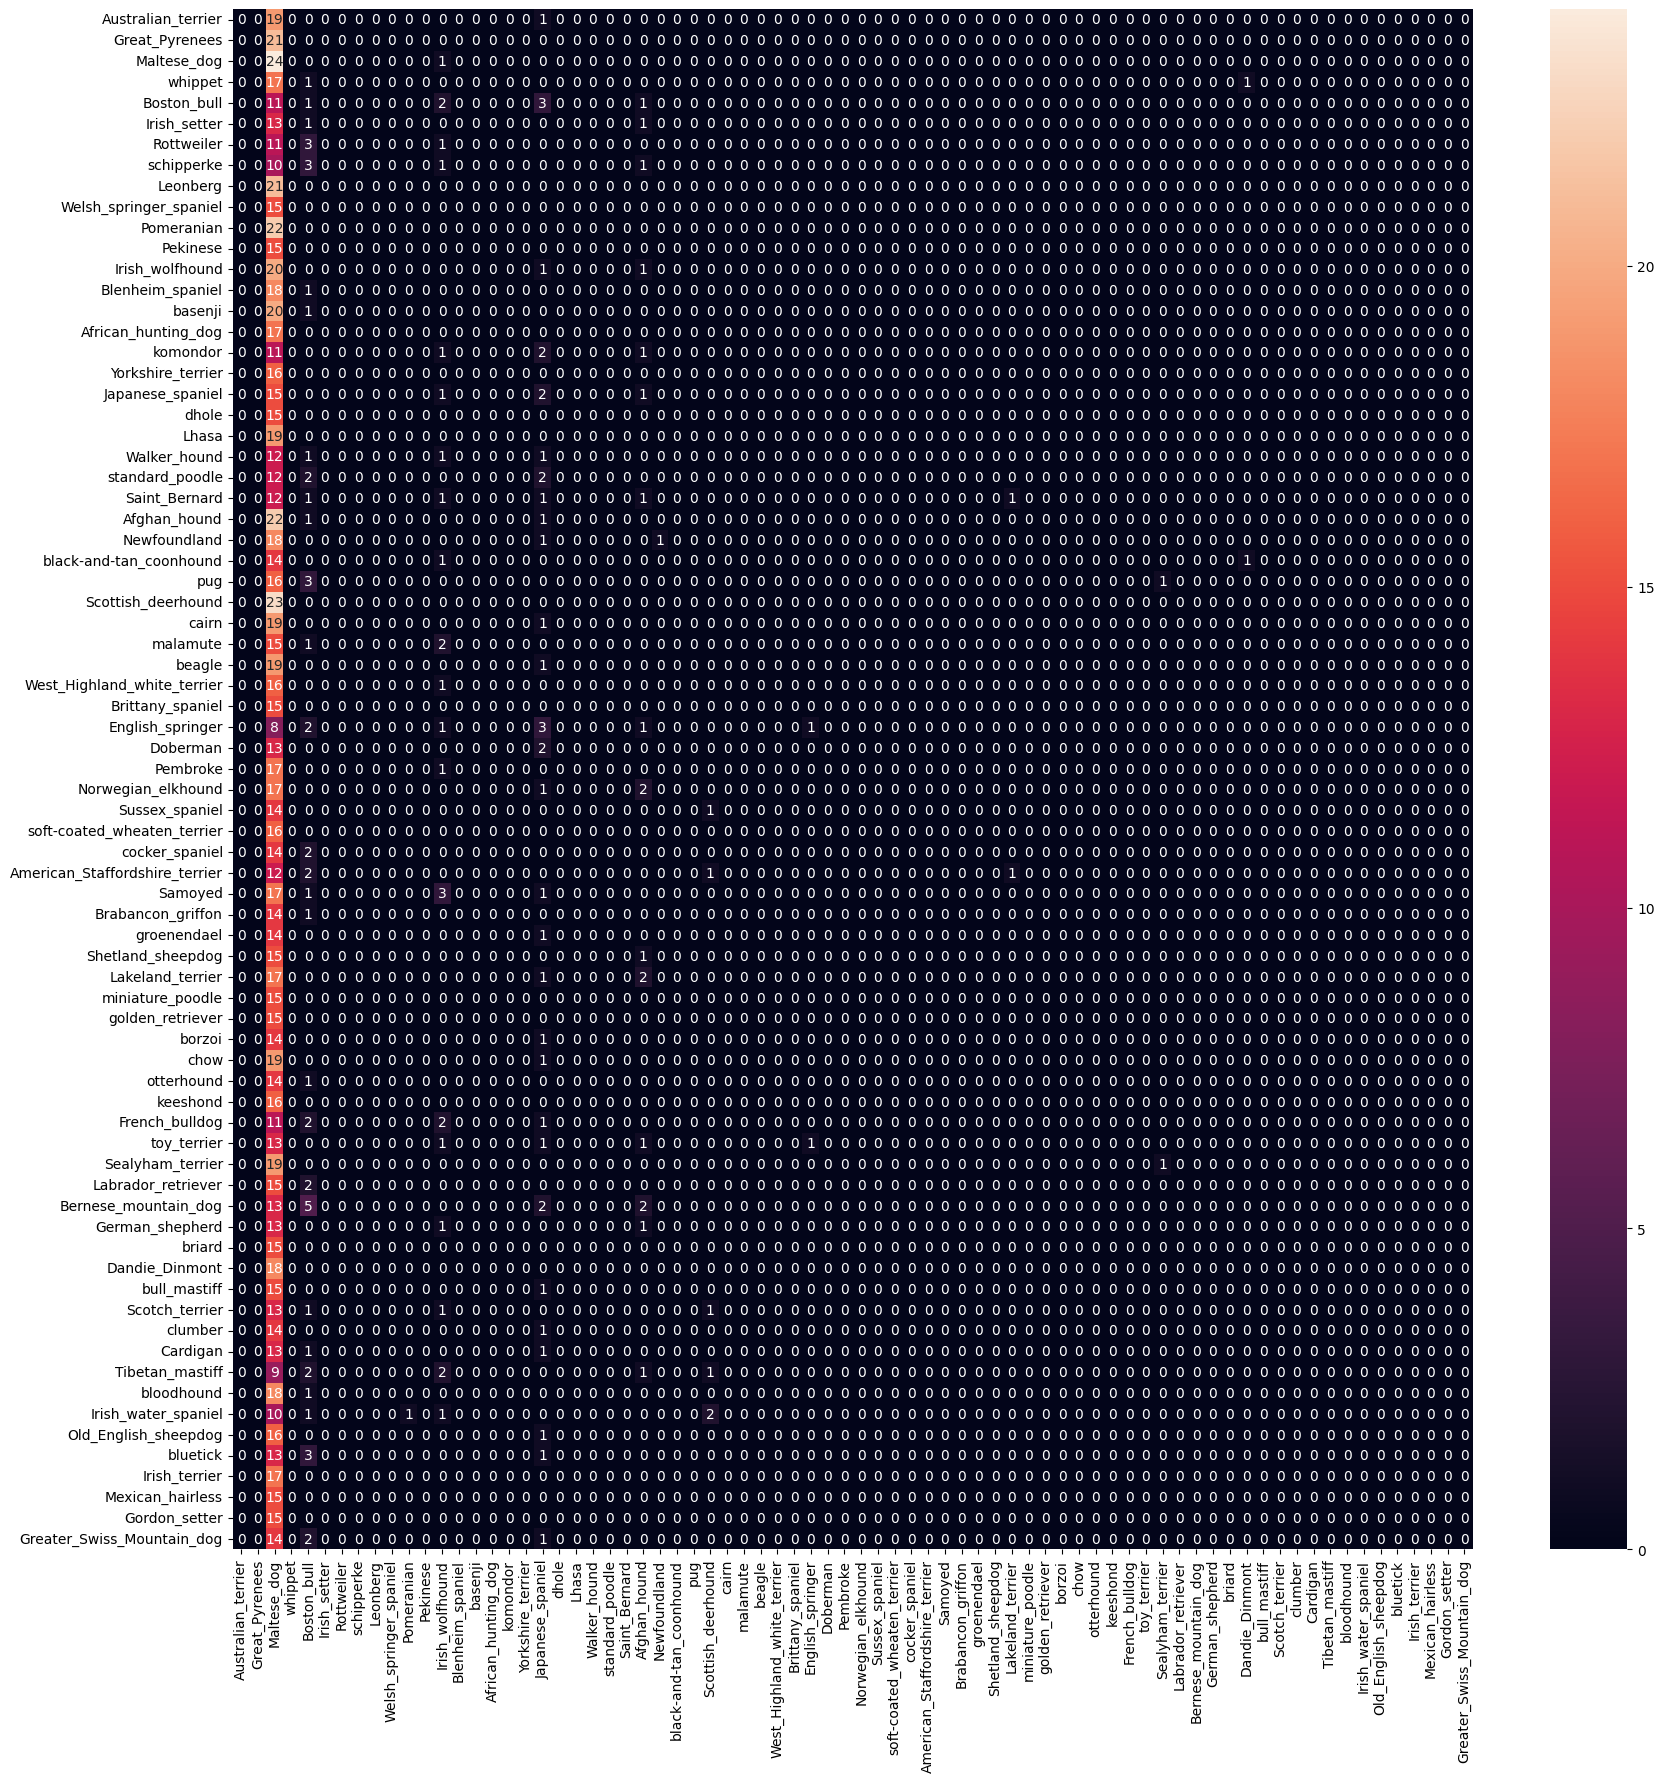

In [ ]:
# Visualizamos la matriz de confusion
predictions = model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=1)
y_true= y_test
confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)

df_cm=pd.DataFrame(confusion_matrix, index = [i for  i in classes], columns = [i for i in classes])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

Vertical Flip + Contrast 0.2

In [ ]:
# Cargamos datos con las funciones de generación de dataset
img_size = (100, 120, 3)
train_dataset = get_dataset(x_train, y_train, img_size[:-1], 128)
valid_dataset = get_dataset(x_valid, y_valid, img_size[:-1], 128)
test_dataset = get_dataset(x_test, y_test, img_size[:-1], 128)

In [ ]:
model = tf.keras.models.Sequential([

  tf.keras.layers.RandomFlip('vertical'),
  tf.keras.layers.RandomBrightness(0.2),

  tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation="relu", input_shape=(100,120,3)),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

  tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dense(len(classes), activation="softmax")
])

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
73/73 [==============================] - 43s 561ms/step - loss: 5.7132 - accuracy: 0.0158 - val_loss: 4.2999 - val_accuracy: 0.0211
Epoch 2/10
73/73 [==============================] - 38s 517ms/step - loss: 4.3829 - accuracy: 0.0184 - val_loss: 4.2962 - val_accuracy: 0.0198
Epoch 3/10
73/73 [==============================] - 42s 572ms/step - loss: 4.2967 - accuracy: 0.0195 - val_loss: 4.2945 - val_accuracy: 0.0198
Epoch 4/10
73/73 [==============================] - 39s 540ms/step - loss: 4.2959 - accuracy: 0.0195 - val_loss: 4.2940 - val_accuracy: 0.0194
Epoch 5/10
73/73 [==============================] - 38s 515ms/step - loss: 4.2958 - accuracy: 0.0195 - val_loss: 4.2941 - val_accuracy: 0.0198
Epoch 6/10
73/73 [==============================] - 43s 584ms/step - loss: 4.2956 - accuracy: 0.0195 - val_loss: 4.2937 - val_accuracy: 0.0198
Epoch 7/10
73/73 [==============================] - 39s 531ms/step - loss: 4.2956 - accuracy: 0.0195 - val_loss: 4.2937 - val_accuracy: 0.0198

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_3 (RandomFlip)  (None, 100, 120, 3)       0         
                                                                 
 random_brightness_1 (Random  (None, 100, 120, 3)      0         
 Brightness)                                                     
                                                                 
 conv2d_6 (Conv2D)           (None, 96, 116, 32)       2432      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 58, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 44, 54, 64)        51264     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 22, 27, 64)      

In [ ]:
model.evaluate(test_dataset)

11/11 [==============================] - 4s 353ms/step - loss: 4.2909 - accuracy: 0.0202


[4.290914058685303, 0.020155038684606552]

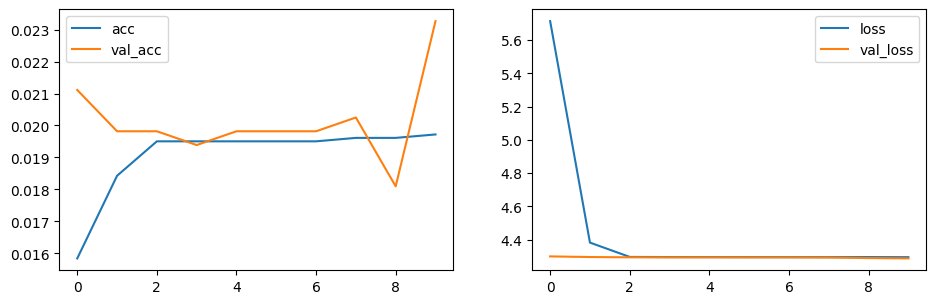

In [ ]:
# Visualizamos la evolución de los epochs
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# precision
fig.add_subplot(10, 10, 1)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.show()

11/11 [==============================] - 4s 350ms/step


<Axes: >

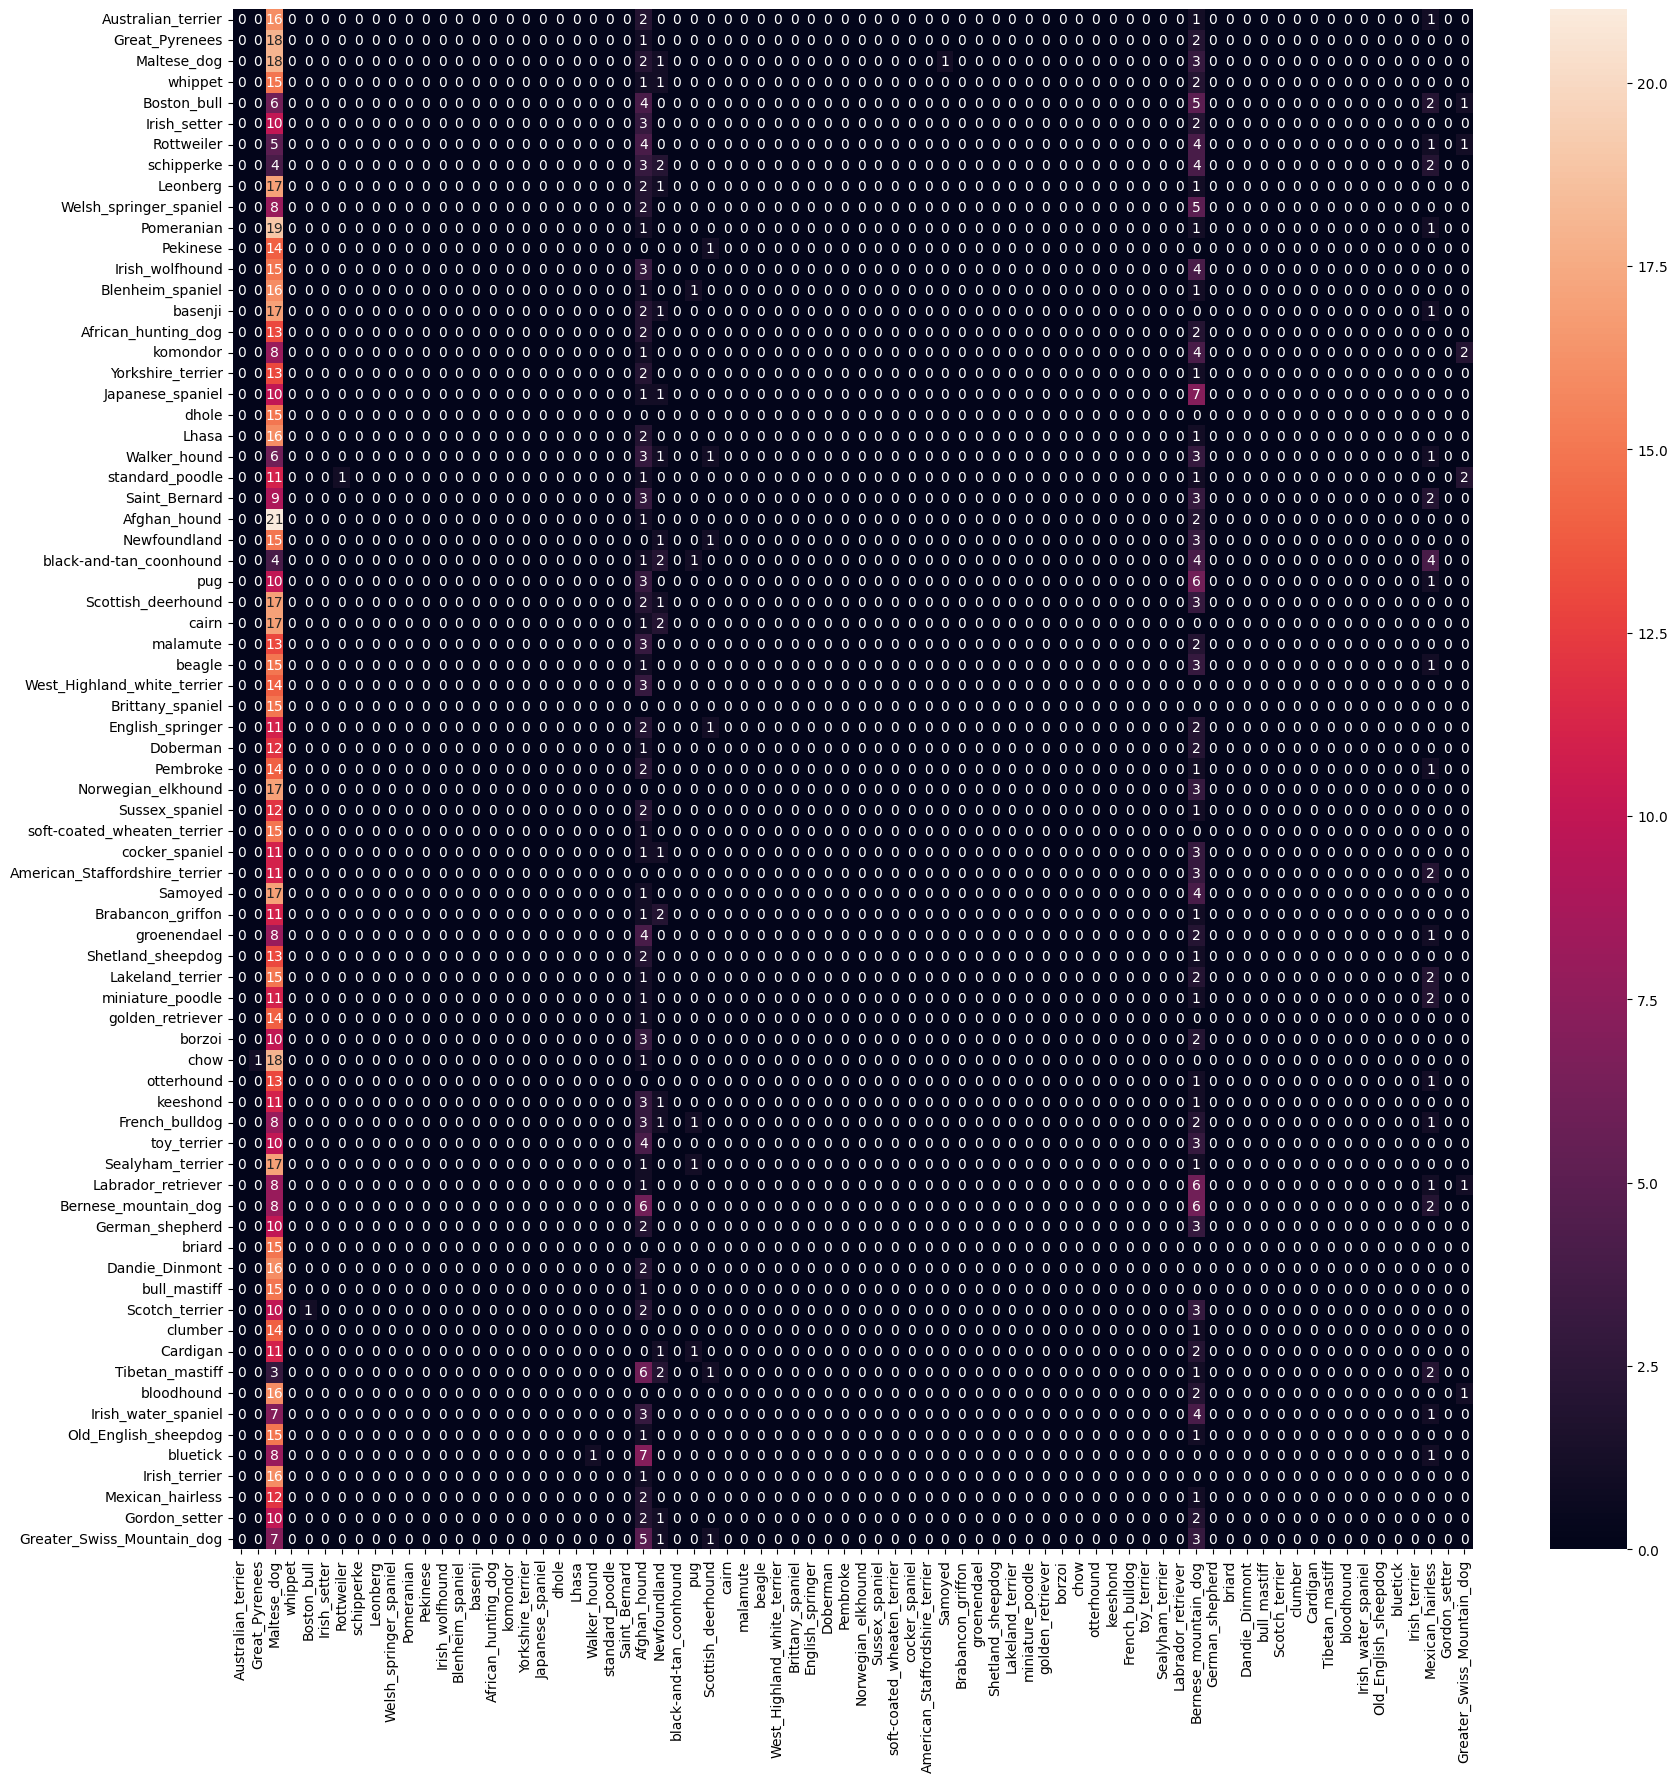

In [ ]:
# Visualizamos la matriz de confusion
predictions = model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=1)
y_true= y_test
confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)

df_cm=pd.DataFrame(confusion_matrix, index = [i for  i in classes], columns = [i for i in classes])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

Horizontal Flip + Vertical Flip + Contrast 0.2

In [ ]:
# Cargamos datos con las funciones de generación de dataset
img_size = (100, 120, 3)
train_dataset = get_dataset(x_train, y_train, img_size[:-1], 128)
valid_dataset = get_dataset(x_valid, y_valid, img_size[:-1], 128)
test_dataset = get_dataset(x_test, y_test, img_size[:-1], 128)

In [ ]:
model = tf.keras.models.Sequential([

  tf.keras.layers.RandomFlip('vertical'),
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomBrightness(0.2),

  tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation="relu", input_shape=(100,120,3)),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

  tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),

  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dense(len(classes), activation="softmax")
])

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
73/73 [==============================] - 42s 522ms/step - loss: 5.9413 - accuracy: 0.0177 - val_loss: 4.3034 - val_accuracy: 0.0190
Epoch 2/10
73/73 [==============================] - 40s 546ms/step - loss: 4.3011 - accuracy: 0.0178 - val_loss: 4.2993 - val_accuracy: 0.0198
Epoch 3/10
73/73 [==============================] - 42s 573ms/step - loss: 4.2986 - accuracy: 0.0182 - val_loss: 4.2967 - val_accuracy: 0.0198
Epoch 4/10
73/73 [==============================] - 39s 534ms/step - loss: 4.2967 - accuracy: 0.0193 - val_loss: 4.2950 - val_accuracy: 0.0198
Epoch 5/10
73/73 [==============================] - 42s 573ms/step - loss: 4.2959 - accuracy: 0.0195 - val_loss: 4.2944 - val_accuracy: 0.0198
Epoch 6/10
73/73 [==============================] - 42s 577ms/step - loss: 4.4453 - accuracy: 0.0198 - val_loss: 4.2943 - val_accuracy: 0.0198
Epoch 7/10
73/73 [==============================] - 38s 517ms/step - loss: 4.2959 - accuracy: 0.0195 - val_loss: 4.2942 - val_accuracy: 0.0198

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_4 (RandomFlip)  (None, 100, 120, 3)       0         
                                                                 
 random_flip_5 (RandomFlip)  (None, 100, 120, 3)       0         
                                                                 
 random_brightness_2 (Random  (None, 100, 120, 3)      0         
 Brightness)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 96, 116, 32)       2432      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 58, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 44, 54, 64)       

In [ ]:
model.evaluate(test_dataset)

11/11 [==============================] - 4s 340ms/step - loss: 4.2935 - accuracy: 0.0194


[4.293468475341797, 0.01937984488904476]

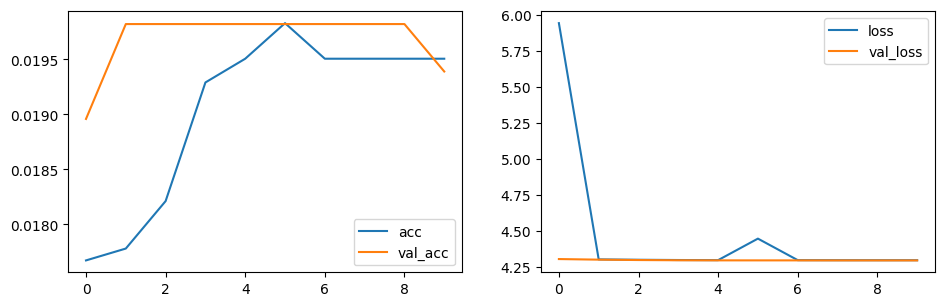

In [ ]:
# Visualizamos la evolución de los epochs
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# precision
fig.add_subplot(10, 10, 1)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.show()

11/11 [==============================] - 4s 349ms/step


<Axes: >

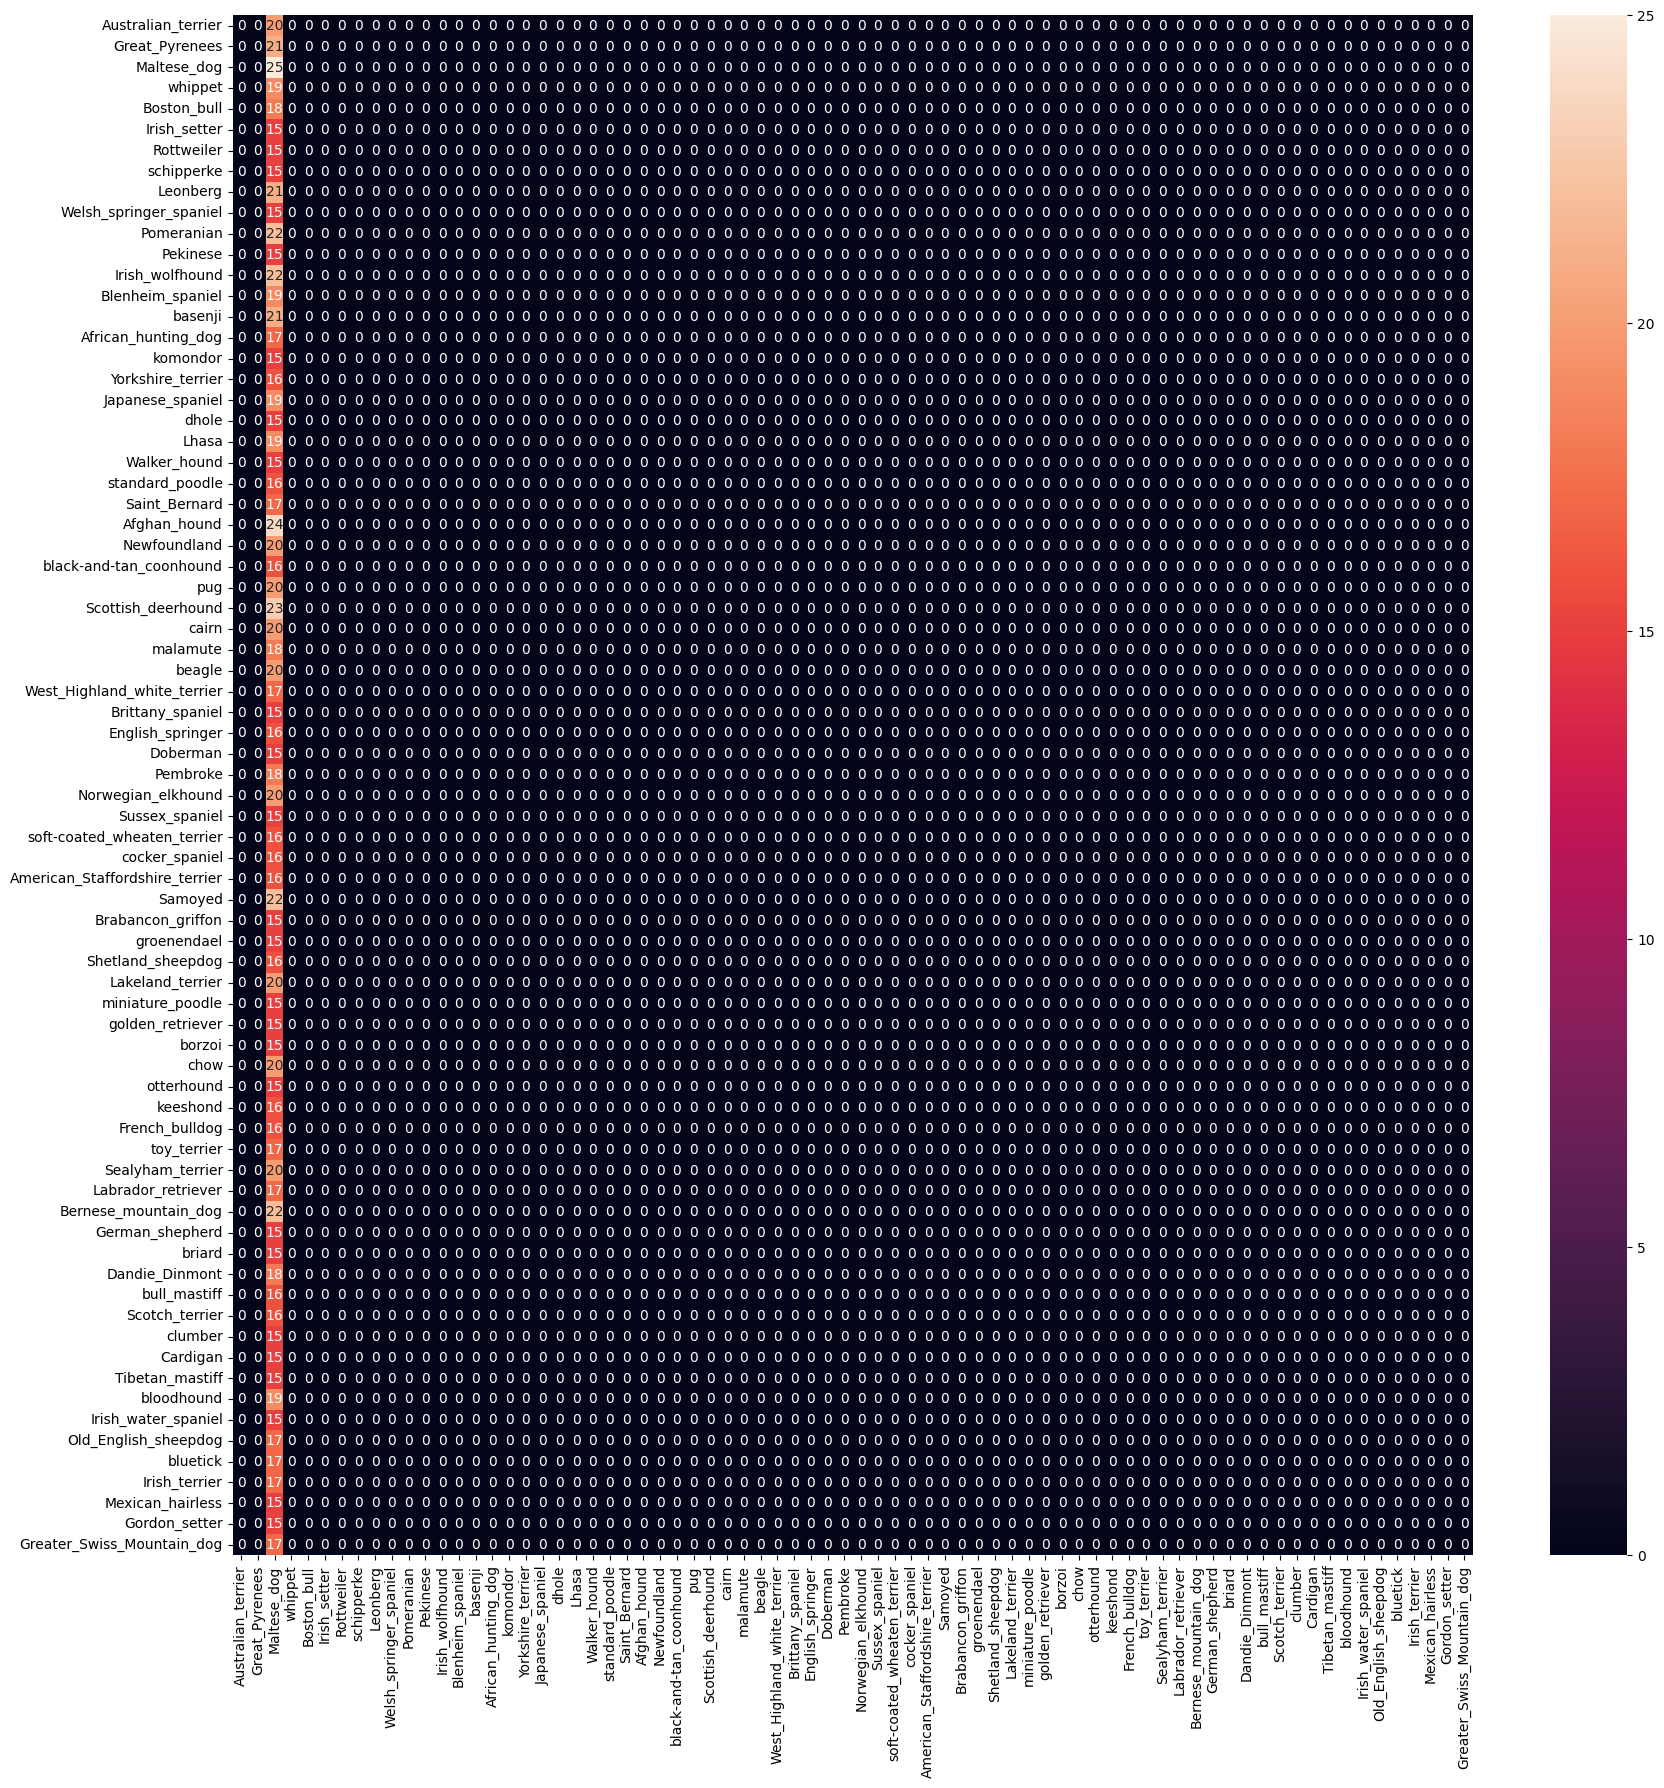

In [ ]:
# Visualizamos la matriz de confusion
predictions = model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=1)
y_true= y_test
confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)

df_cm=pd.DataFrame(confusion_matrix, index = [i for  i in classes], columns = [i for i in classes])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

---

From the results obtained above, it can be seen that, in those cases in which contrast is used, the model predicts all breeds as maltese_dog, obtaining a high loss in training and validation that decreases very little between epochs and an accuracy for training. and validation very low that barely experience an increase as the epochs occur. This is why data augmentation using contrast does not improve the model, but rather makes it predict the same race for practically any image.
<br>
<br>
About the application of Horizontal or Vertical Random Flip in isolation (without applying another data augmentation method), we can see that (in both cases, both with Horizontal Flip and Vertical Flip) the loss values ​​decrease for training but increase for validation, and the accuracy values ​​increase for training and remain stable for validation. In the confusion matrix, there is no clear diagonal, so the predictions are, in general, erroneous. This is therefore a case of overfitting that could be solved by applying a higher dropout or trying to obtain more data with data augmentation, although when applying Random Flip Horizontal and Random Flip Vertical we can see that the same situation occurs as described above for the application of just one of the two.
<br>
<br>
The fact that the model does not fit the data better when data augmentation has been applied is because we are dealing with balanced data (there are a similar number of images for each race) and therefore, applying data augmentation does not solve a problem. of imbalance between the data.



---

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section9"></a>
## <font color="#00586D"> AutoKeras (optional) </font>
<br>


In this experiments we are going to use AutoKeras to perform the training. We will focus on using the `ImageClassifier` block at a high level, with only a `max_trials` of 1 since it will be a very computationally expensive experiment.

The network architecture must be following:
* Input size will be `(100, 120, 3)`.
* `ImageClassifier` block with the following configuration:
  - `max_trials` of 1
  - In `metrics` includes the `accuracy`
  - `overwrite` to `True`

  In this type of block you can pass the `x` parameter a `tf.data.Dataset` as well as the `validation_data` parameters.

Training settings:
*Epochs: 10* Callbacks: Use `EarlyStopping` with a `patience` of 2 to end training early if the model stops learning.

In [ ]:
# Cargamos datos con las funciones de generación de dataset
img_size = (100, 120, 3)
train_dataset = get_dataset(x_train, y_train, img_size[:-1], 128)
valid_dataset = get_dataset(x_valid, y_valid, img_size[:-1], 128)
test_dataset = get_dataset(x_test, y_test, img_size[:-1], 128)

In [ ]:
#   - Crear la red
clf = ak.ImageClassifier(overwrite=True, metrics="accuracy", max_trials=1)
#   - Entrena la red
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='auto', baseline=None, restore_best_weights=False)
clf.fit(train_dataset, epochs=10, validation_data=valid_dataset, callbacks=[early_stop])

Trial 1 Complete [00h 26m 12s]
val_loss: 3.9343338012695312

Best val_loss So Far: 3.9343338012695312
Total elapsed time: 00h 26m 12s


In [ ]:
predicted_y = clf.predict(valid_dataset)
print(predicted_y)

19/19 [==============================] - 13s 677ms/step
[['52']
 ['12']
 ['33']
 ...
 ['59']
 ['9']
 ['59']]


In [ ]:
clf.evaluate(test_dataset)
print("accuracy:", (acc*100), "%")

11/11 [==============================] - 17s 998ms/step - loss: 3.9539 - accuracy: 0.0674
accuracy: 7.410598546266556 %


In [ ]:
clf.export_model().summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 120, 3)]     0         
                                                                 
 cast_to_float32 (CastToFlo  (None, 100, 120, 3)       0         
 at32)                                                           
                                                                 
 normalization (Normalizati  (None, 100, 120, 3)       7         
 on)                                                             
                                                                 
 conv2d (Conv2D)             (None, 98, 118, 32)       896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 116, 64)       18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 58, 64)        0     

In [ ]:
_, acc = clf.evaluate(valid_dataset)
print("accuracy:", (acc*100), "%")

19/19 [==============================] - 32s 1s/step - loss: 3.9343 - accuracy: 0.0741
accuracy: 7.410598546266556 %


In [ ]:
model = clf.export_model()

11/11 [==============================] - 6s 597ms/step


<Axes: >

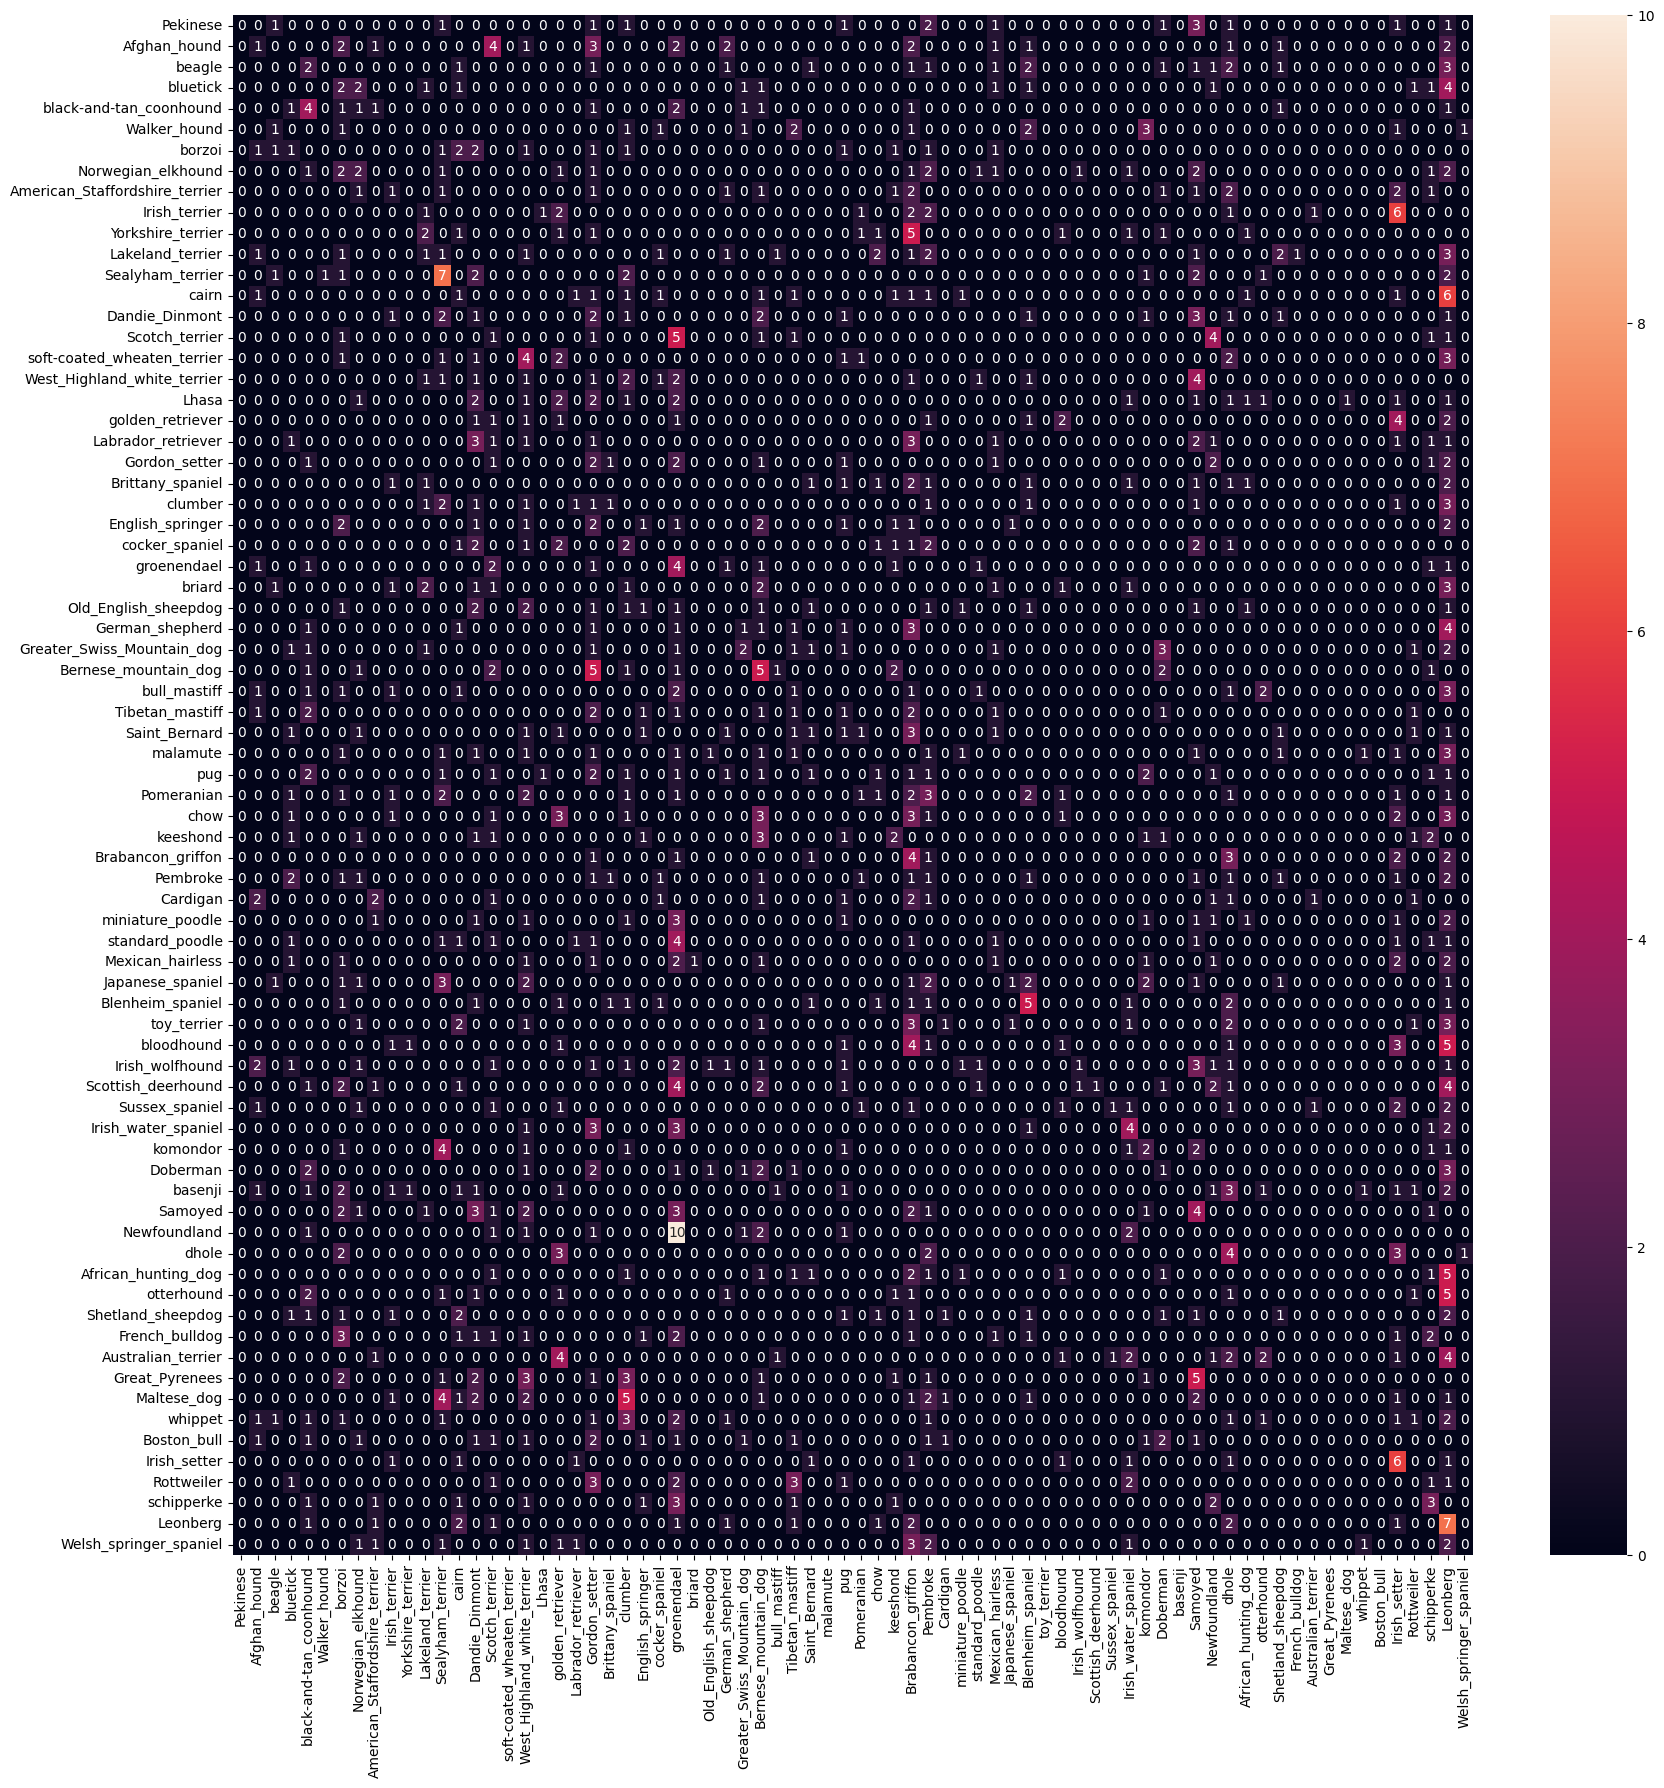

In [ ]:
# Visualizamos la matriz de confusion
predictions = model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=1)
y_true= y_test
confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)

df_cm=pd.DataFrame(confusion_matrix, index = [i for  i in classes], columns = [i for i in classes])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)




---

Because autokeras version 2.4.0 is not available as it is an old version:
<br>
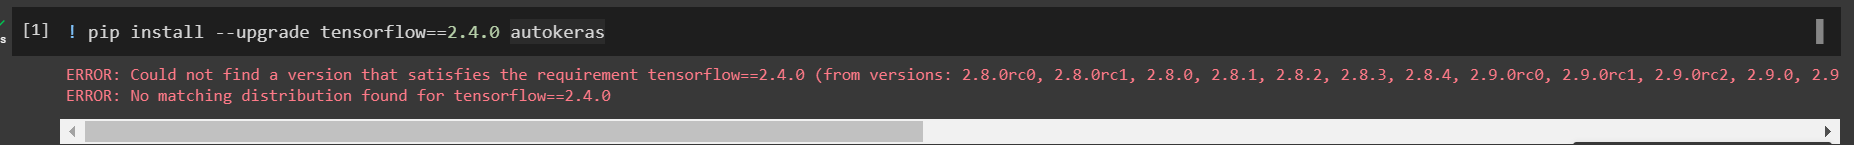
<br>At the end of the model training, a warning appears that does not allow us to see the accuracy and loss values ​​for each epoch and does not allow us to save them in a variable (when I try to save the training in a history variable, it becomes a Nonetype object ), so I have not been able to make a plot with the evolution of accuracy and loss during the epochs.
<br>
However, since the model ends at epoch 4 due to the callback, I have taken a screenshot of the training while it was being carried out to be able to make an evaluation:
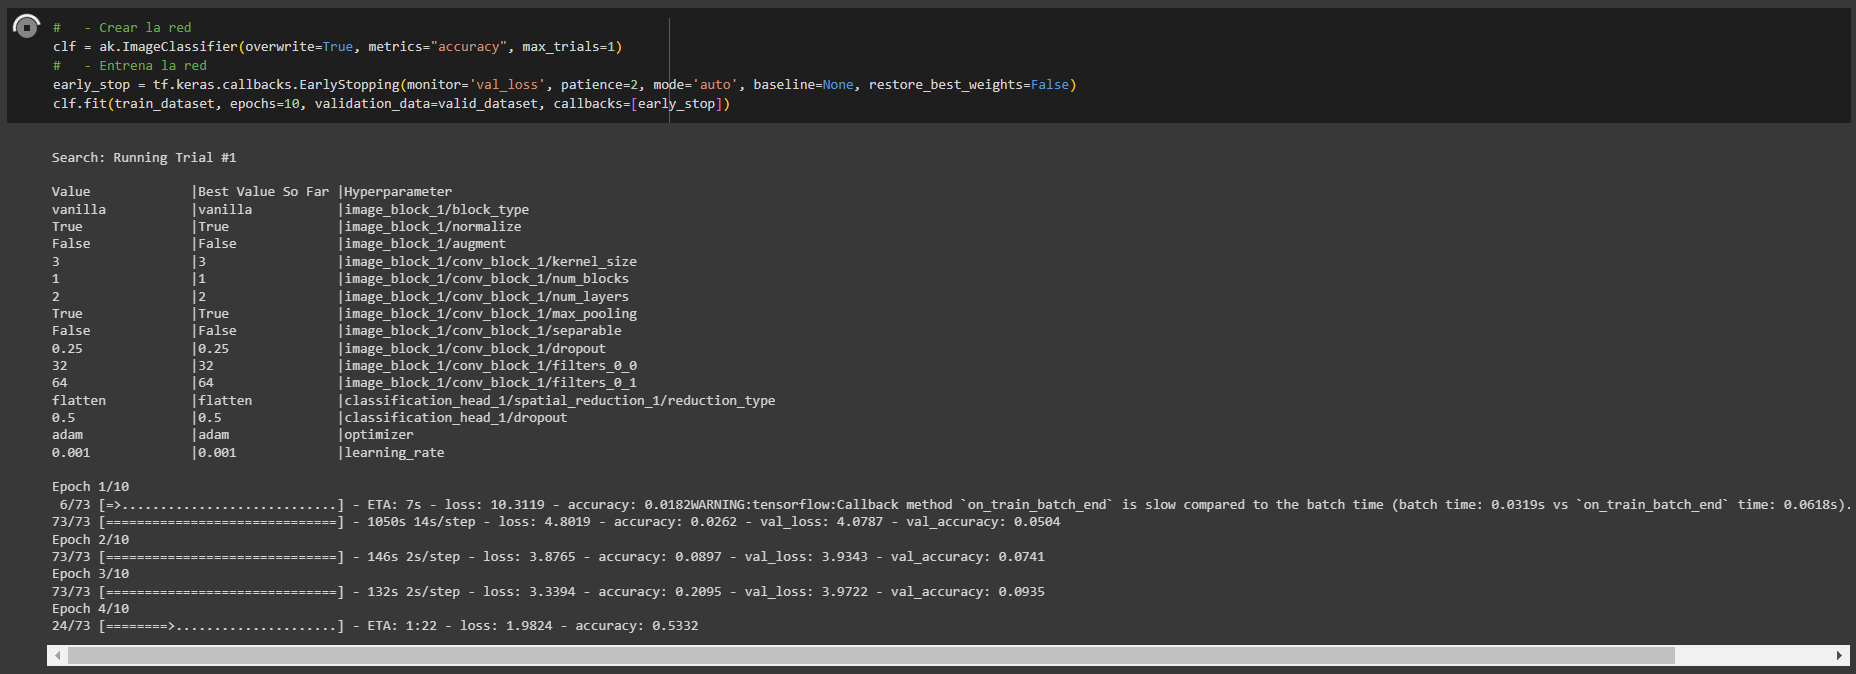
<br>
As can be seen, the accuracy values increase for both training and validation (although in validation it increases much less). The loss values decrease for training and remain at approximately the same value (4.0) for validation. This is a similar case to the one we had in the hyperparameter tuning section.
<br>
Through the confusion matrix we observe that the model does not fit the data since many races are predicted incorrectly and a clear diagonal is not observed.

---


<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="sectionopt"></a>
## <font color="#00586D"> Conclusion</font>
<br>


Once all the previous experiments have been carried out, which model would you choose to deploy in production? Because?

Explain in brief words which model you would choose to deploy in production and why. Compare each experiment and draw your own conclusions.

---

Taking into account everything we have described above about each model and its ability to fit the data, we can conclude that the most suitable model to deploy in production is the pre-trained Inception model to which we add a Dropout layer of 0.5 and a output layer with softmax.
<br>
The rest of the models, in comparison, do not fit the data well enough.


---